In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

heatmap_len = 20

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
main_path = '/content/drive/MyDrive/picoRing_mouse_SNR_v2'

In [5]:
def analyzeNoise(freq, dB, target_ids, deg):
    noise_diff_list = np.zeros(shape=(len(dB), len(target_ids[0])))
    x = freq[target_ids]
    for i in range(len(dB)):
        d = dB[i]
        y = d[target_ids]
        yn = np.poly1d(np.polyfit(x, y, deg))
        noise_diff_list[i] = -(y - yn(x))

    noise_diff_ave = np.average(noise_diff_list, axis=0)
    noise_diff_std= np.std(noise_diff_list, axis=0)
    noise_diff_max = np.amax(noise_diff_list, axis=0)
    noise_std_max = np.max(noise_diff_std)
    noise_max_max = np.max(noise_diff_max)

    return noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max


def analyzeData(freq, dB, target_ids, deg):
    data_diff_list = np.zeros(shape=(len(dB), len(target_ids[0])))
    print(data_diff_list.shape)

    x = freq[target_ids]
    for i in range(len(dB)):
        d = dB[i]
        y = d[target_ids]
        yn = np.poly1d(np.polyfit(x, y, deg))
        data_diff_list[i] = -(y - yn(x))

    data_diff_ave = np.average(np.abs(data_diff_list), axis=0)
    data_diff_std= np.std(np.abs(data_diff_list), axis=0)
    data_diff_max = np.amax(np.abs(data_diff_list), axis=0)

    return  data_diff_ave,  data_diff_std,  data_diff_max


def makeColormap(freq, dB, target_ids, deg, noise_ave_, noise_std_, offset=0):
    data_diff_list = np.zeros(shape=(len(dB), len(target_ids[0])))

    x = freq[target_ids]
    for i in range(len(dB)):
        d = dB[i+offset]
        y = d[target_ids]
        yn = np.poly1d(np.polyfit(x, y, deg))
        data_diff_list[i] = -(y - yn(x))

    colormap = np.zeros(shape=(heatmap_len, len(target_ids[0])))
    for i in range(heatmap_len):
        snr = data_diff_list[i] - noise_ave_
        colormap[i] = snr/noise_std_

    return colormap

(100, 67)
[peak] freq: 27.900000000000034, ave: 0.369, std: 0.002, max: 0.372
[noise] freq: 27.900000000000034, ave: 0.005, std: 0.006, max: 0.008,
[SNR] 298.005 +- 1.289


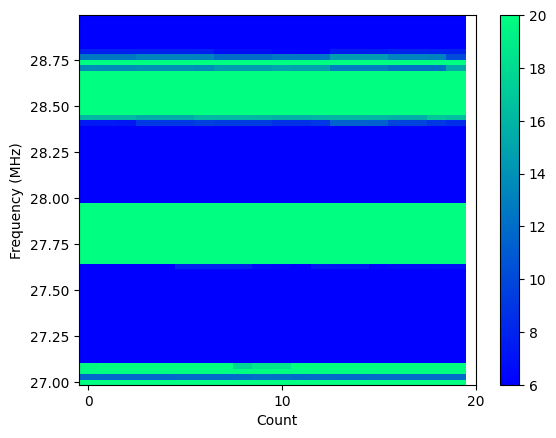

In [ ]:
#0V input, None
data = np.load(main_path+'/nano_0_10.npy')
noise = np.load(main_path+'/nano_0_noise.npy')

peak_freq = 27.9
ave_num = 100
deg=4

start_freq = 27
end_freq = 29


freq = noise[0]
dB = noise[1:ave_num+1]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[1:ave_num+1]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.3f} +- {:.3f}'.format(snr, std_snr))

heatmap_Qi = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_Qi.T, vmin=6, vmax=20, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(100, 67)
[peak] freq: 27.900000000000034, ave: 0.221, std: 0.001, max: 0.223
[noise] freq: 27.900000000000034, ave: 0.005, std: 0.006, max: 0.008,
[SNR] 176.770 +- 0.995


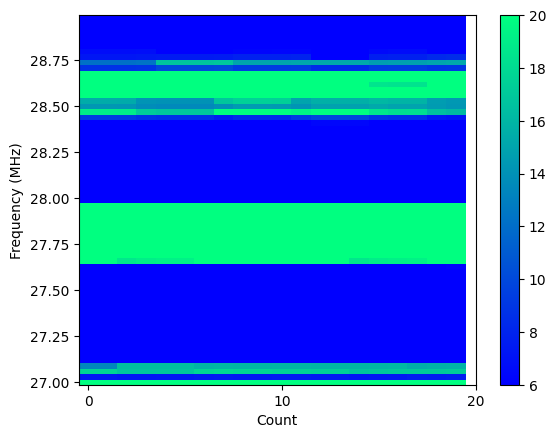

In [ ]:
#0V input, None
data = np.load(main_path+'/nano_0_11.npy')
noise = np.load(main_path+'/nano_0_noise.npy')

peak_freq = 27.9
ave_num = 100
deg=4

start_freq = 27
end_freq = 29


freq = noise[0]
dB = noise[1:ave_num+1]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[1:ave_num+1]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.3f} +- {:.3f}'.format(snr, std_snr))

heatmap_Qi = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_Qi.T, vmin=6, vmax=20, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(100, 67)
[peak] freq: 27.900000000000034, ave: 0.140, std: 0.001, max: 0.143
[noise] freq: 27.900000000000034, ave: 0.005, std: 0.006, max: 0.008,
[SNR] 110.513 +- 0.985


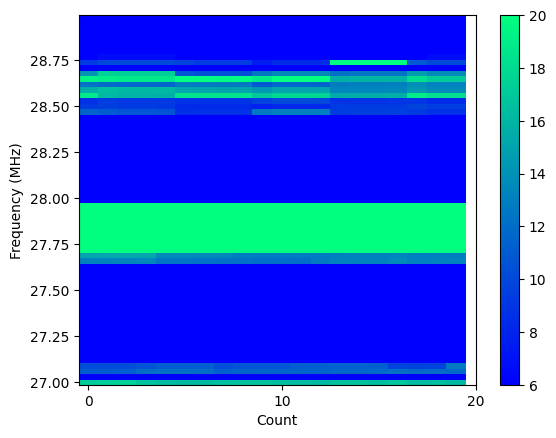

In [ ]:
#0V input, None
data = np.load(main_path+'/nano_0_12.npy')
noise = np.load(main_path+'/nano_0_noise.npy')

peak_freq = 27.9
ave_num = 100
deg=4

start_freq = 27
end_freq = 29


freq = noise[0]
dB = noise[1:ave_num+1]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[1:ave_num+1]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.3f} +- {:.3f}'.format(snr, std_snr))

heatmap_Qi = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_Qi.T, vmin=6, vmax=20, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(100, 67)
[peak] freq: 27.900000000000034, ave: 0.091, std: 0.001, max: 0.094
[noise] freq: 27.900000000000034, ave: 0.005, std: 0.006, max: 0.008,
[SNR] 70.404 +- 0.944


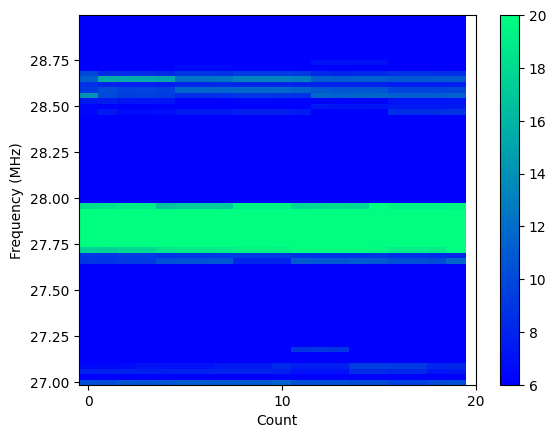

In [ ]:
#0V input, None
data = np.load(main_path+'/nano_0_13.npy')
noise = np.load(main_path+'/nano_0_noise.npy')

peak_freq = 27.9
ave_num = 100
deg=4

start_freq = 27
end_freq = 29


freq = noise[0]
dB = noise[1:ave_num+1]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[1:ave_num+1]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.3f} +- {:.3f}'.format(snr, std_snr))

heatmap_Qi = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_Qi.T, vmin=6, vmax=20, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(100, 67)
[peak] freq: 27.900000000000034, ave: 0.062, std: 0.001, max: 0.065
[noise] freq: 27.900000000000034, ave: 0.005, std: 0.006, max: 0.008,
[SNR] 46.888 +- 0.769


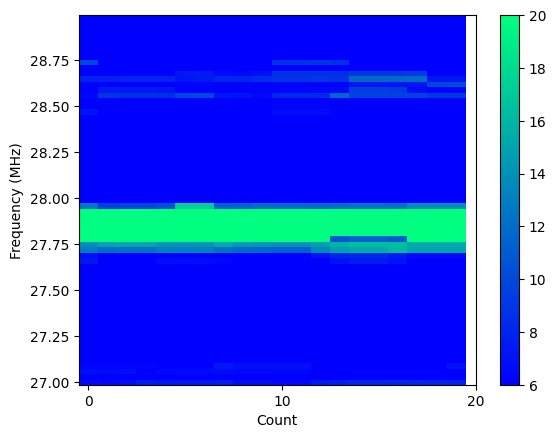

In [ ]:
#0V input, None
data = np.load(main_path+'/nano_0_14.npy')
noise = np.load(main_path+'/nano_0_noise.npy')

peak_freq = 27.9
ave_num = 100
deg=4

start_freq = 27
end_freq = 29


freq = noise[0]
dB = noise[1:ave_num+1]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[1:ave_num+1]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.3f} +- {:.3f}'.format(snr, std_snr))

heatmap_Qi = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_Qi.T, vmin=6, vmax=20, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

In [ ]:
heatmap_len = 7

(100, 67)
[peak] freq: 27.900000000000034, ave: 0.044, std: 0.001, max: 0.047
[noise] freq: 27.900000000000034, ave: 0.005, std: 0.006, max: 0.008,
[SNR] 31.958 +- 0.998


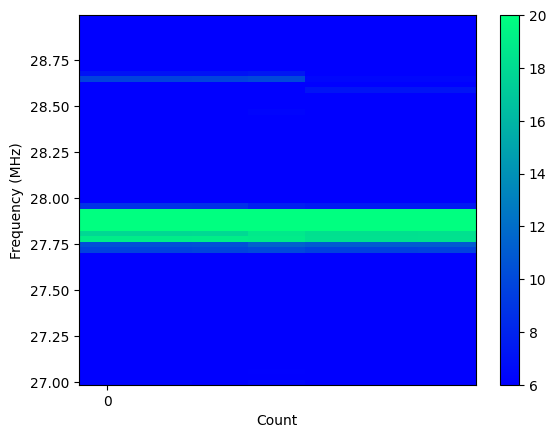

In [ ]:
#0V input, None
data = np.load(main_path+'/nano_0_15.npy')
noise = np.load(main_path+'/nano_0_noise.npy')

peak_freq = 27.9
ave_num = 100
deg=4

start_freq = 27
end_freq = 29


freq = noise[0]
dB = noise[1:ave_num+1]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[1:ave_num+1]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.3f} +- {:.3f}'.format(snr, std_snr))

heatmap_Qi = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_Qi.T, vmin=6, vmax=20, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(100, 67)
[peak] freq: 27.900000000000034, ave: 0.032, std: 0.001, max: 0.035
[noise] freq: 27.900000000000034, ave: 0.005, std: 0.006, max: 0.008,
[SNR] 22.001 +- 0.930


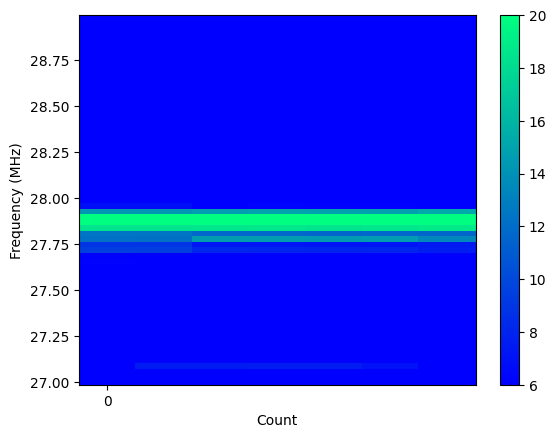

In [ ]:
#0V input, None
data = np.load(main_path+'/nano_0_16.npy')
noise = np.load(main_path+'/nano_0_noise.npy')

peak_freq = 27.9
ave_num = 100
deg=4

start_freq = 27
end_freq = 29


freq = noise[0]
dB = noise[1:ave_num+1]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[1:ave_num+1]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.3f} +- {:.3f}'.format(snr, std_snr))

heatmap_Qi = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_Qi.T, vmin=6, vmax=20, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(100, 67)
[peak] freq: 27.900000000000034, ave: 0.024, std: 0.001, max: 0.027
[noise] freq: 27.900000000000034, ave: 0.005, std: 0.006, max: 0.008,
[SNR] 15.686 +- 0.662


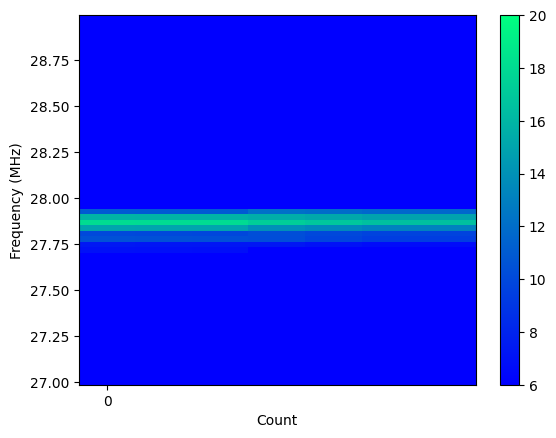

In [ ]:
#0V input, None
data = np.load(main_path+'/nano_0_17.npy')
noise = np.load(main_path+'/nano_0_noise.npy')

peak_freq = 27.9
ave_num = 100
deg=4

start_freq = 27
end_freq = 29


freq = noise[0]
dB = noise[1:ave_num+1]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[1:ave_num+1]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.3f} +- {:.3f}'.format(snr, std_snr))

heatmap_Qi = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_Qi.T, vmin=6, vmax=20, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(100, 67)
[peak] freq: 27.900000000000034, ave: 0.019, std: 0.001, max: 0.025
[noise] freq: 27.900000000000034, ave: 0.005, std: 0.006, max: 0.008,
[SNR] 11.317 +- 1.225


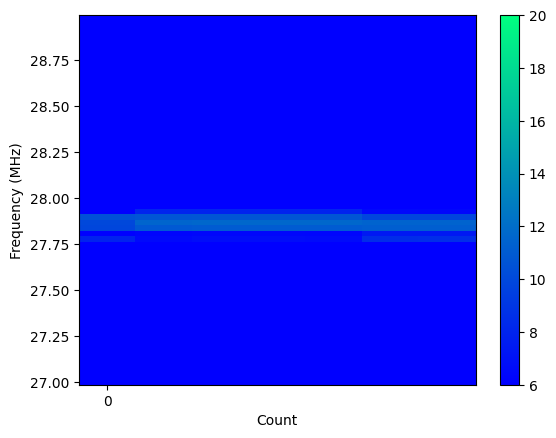

In [ ]:
#0V input, None
data = np.load(main_path+'/nano_0_18.npy')
noise = np.load(main_path+'/nano_0_noise.npy')

peak_freq = 27.9
ave_num = 100
deg=4

start_freq = 27
end_freq = 29


freq = noise[0]
dB = noise[1:ave_num+1]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[1:ave_num+1]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.3f} +- {:.3f}'.format(snr, std_snr))

heatmap_Qi = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_Qi.T, vmin=6, vmax=20, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(100, 67)
[peak] freq: 27.900000000000034, ave: 0.015, std: 0.001, max: 0.017
[noise] freq: 27.900000000000034, ave: 0.005, std: 0.006, max: 0.008,
[SNR] 8.107 +- 0.717


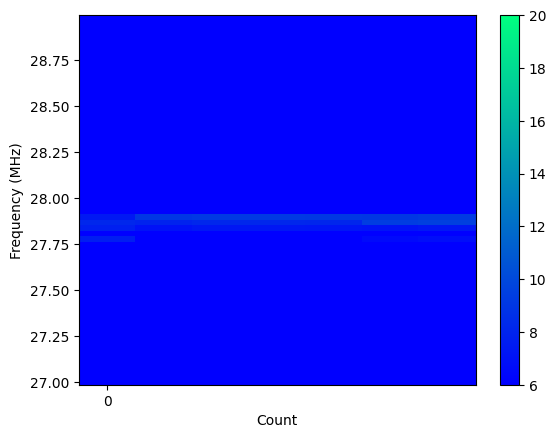

In [ ]:
#0V input, None
data = np.load(main_path+'/nano_0_19.npy')
noise = np.load(main_path+'/nano_0_noise.npy')

peak_freq = 27.9
ave_num = 100
deg=4

start_freq = 27
end_freq = 29


freq = noise[0]
dB = noise[1:ave_num+1]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[1:ave_num+1]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.3f} +- {:.3f}'.format(snr, std_snr))

heatmap_Qi = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_Qi.T, vmin=6, vmax=20, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(100, 67)
[peak] freq: 27.900000000000034, ave: 0.012, std: 0.001, max: 0.015
[noise] freq: 27.900000000000034, ave: 0.005, std: 0.006, max: 0.008,
[SNR] 5.518 +- 1.020


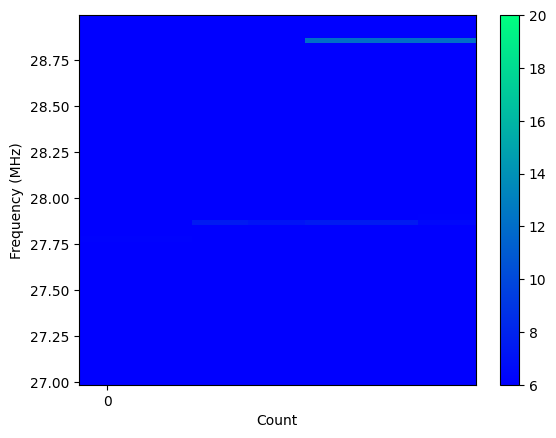

In [ ]:
#0V input, None
data = np.load(main_path+'/nano_0_20.npy')
noise = np.load(main_path+'/nano_0_noise.npy')

peak_freq = 27.9
ave_num = 100
deg=4

start_freq = 27
end_freq = 29


freq = noise[0]
dB = noise[1:ave_num+1]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[1:ave_num+1]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.3f} +- {:.3f}'.format(snr, std_snr))

heatmap_Qi = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_Qi.T, vmin=6, vmax=20, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(100, 67)
[peak] freq: 27.900000000000034, ave: 0.226, std: 0.001, max: 0.228
[noise] freq: 27.900000000000034, ave: 0.005, std: 0.006, max: 0.008,
[SNR] 181.013 +- 0.699


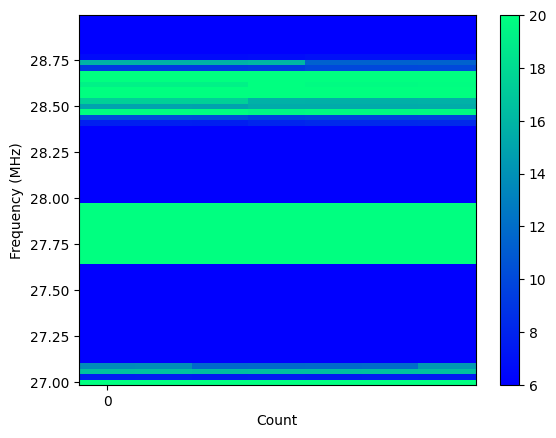

In [ ]:
#0V input, None
data = np.load(main_path+'/nano_30_10.npy')
noise = np.load(main_path+'/nano_0_noise.npy')

peak_freq = 27.9
ave_num = 100
deg=4

start_freq = 27
end_freq = 29


freq = noise[0]
dB = noise[1:ave_num+1]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[1:ave_num+1]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.3f} +- {:.3f}'.format(snr, std_snr))

heatmap_Qi = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_Qi.T, vmin=6, vmax=20, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(100, 67)
[peak] freq: 27.900000000000034, ave: 0.138, std: 0.001, max: 0.140
[noise] freq: 27.900000000000034, ave: 0.005, std: 0.006, max: 0.008,
[SNR] 108.622 +- 1.012


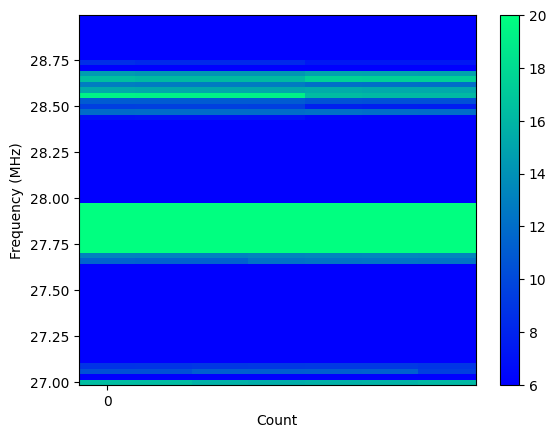

In [ ]:
#0V input, None
data = np.load(main_path+'/nano_30_11.npy')
noise = np.load(main_path+'/nano_0_noise.npy')

peak_freq = 27.9
ave_num = 100
deg=4

start_freq = 27
end_freq = 29


freq = noise[0]
dB = noise[1:ave_num+1]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[1:ave_num+1]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.3f} +- {:.3f}'.format(snr, std_snr))

heatmap_Qi = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_Qi.T, vmin=6, vmax=20, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(100, 67)
[peak] freq: 27.900000000000034, ave: 0.090, std: 0.001, max: 0.093
[noise] freq: 27.900000000000034, ave: 0.005, std: 0.006, max: 0.008,
[SNR] 69.446 +- 0.854


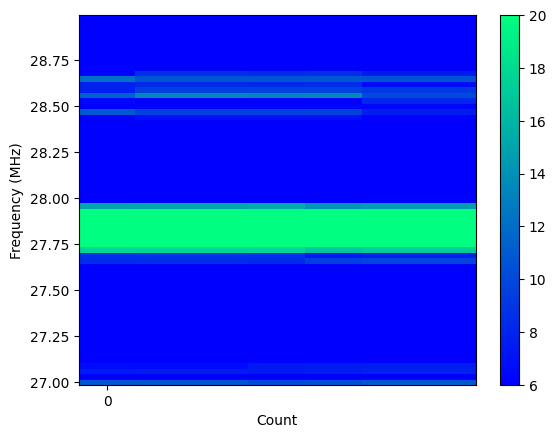

In [ ]:
#0V input, None
data = np.load(main_path+'/nano_30_12.npy')
noise = np.load(main_path+'/nano_0_noise.npy')

peak_freq = 27.9
ave_num = 100
deg=4

start_freq = 27
end_freq = 29


freq = noise[0]
dB = noise[1:ave_num+1]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[1:ave_num+1]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.3f} +- {:.3f}'.format(snr, std_snr))

heatmap_Qi = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_Qi.T, vmin=6, vmax=20, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(100, 67)
[peak] freq: 27.900000000000034, ave: 0.060, std: 0.001, max: 0.063
[noise] freq: 27.900000000000034, ave: 0.005, std: 0.006, max: 0.008,
[SNR] 45.057 +- 0.750


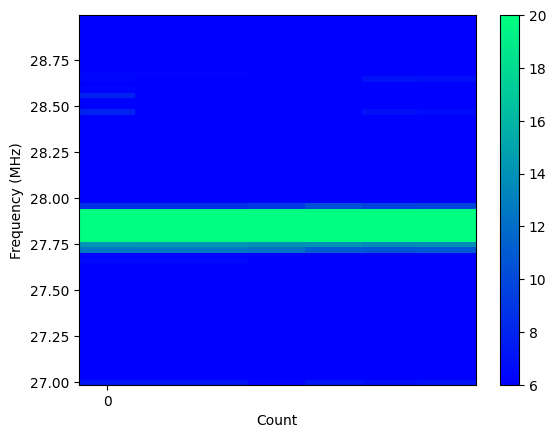

In [ ]:
#0V input, None
data = np.load(main_path+'/nano_30_13.npy')
noise = np.load(main_path+'/nano_0_noise.npy')

peak_freq = 27.9
ave_num = 100
deg=4

start_freq = 27
end_freq = 29


freq = noise[0]
dB = noise[1:ave_num+1]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[1:ave_num+1]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.3f} +- {:.3f}'.format(snr, std_snr))

heatmap_Qi = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_Qi.T, vmin=6, vmax=20, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(100, 67)
[peak] freq: 27.900000000000034, ave: 0.041, std: 0.001, max: 0.044
[noise] freq: 27.900000000000034, ave: 0.005, std: 0.006, max: 0.008,
[SNR] 29.503 +- 1.012


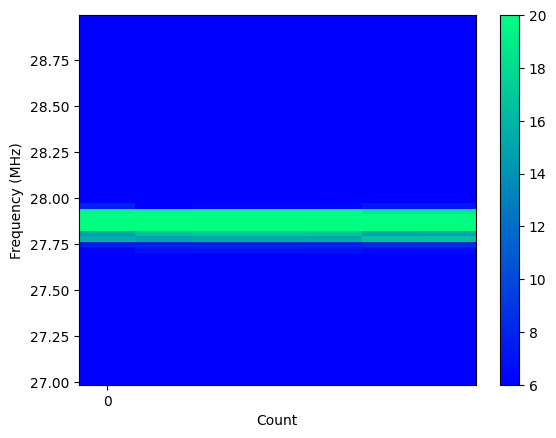

In [ ]:
#0V input, None
data = np.load(main_path+'/nano_30_14.npy')
noise = np.load(main_path+'/nano_0_noise.npy')

peak_freq = 27.9
ave_num = 100
deg=4

start_freq = 27
end_freq = 29


freq = noise[0]
dB = noise[1:ave_num+1]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[1:ave_num+1]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.3f} +- {:.3f}'.format(snr, std_snr))

heatmap_Qi = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_Qi.T, vmin=6, vmax=20, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(100, 67)
[peak] freq: 27.900000000000034, ave: 0.031, std: 0.004, max: 0.055
[noise] freq: 27.900000000000034, ave: 0.005, std: 0.006, max: 0.008,
[SNR] 20.785 +- 3.624


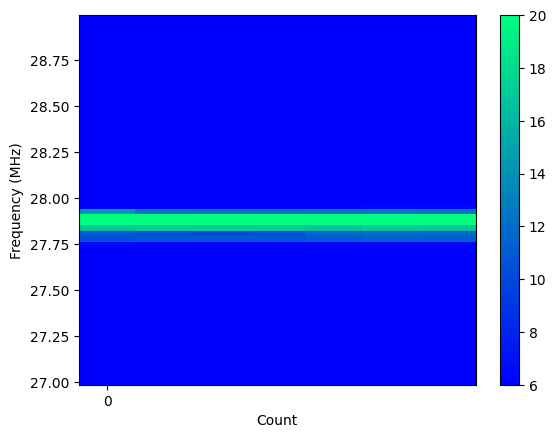

In [ ]:
#0V input, None
data = np.load(main_path+'/nano_30_15.npy')
noise = np.load(main_path+'/nano_0_noise.npy')

peak_freq = 27.9
ave_num = 100
deg=4

start_freq = 27
end_freq = 29


freq = noise[0]
dB = noise[1:ave_num+1]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[1:ave_num+1]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.3f} +- {:.3f}'.format(snr, std_snr))

heatmap_Qi = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_Qi.T, vmin=6, vmax=20, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(100, 67)
[peak] freq: 27.900000000000034, ave: 0.022, std: 0.001, max: 0.024
[noise] freq: 27.900000000000034, ave: 0.005, std: 0.006, max: 0.008,
[SNR] 13.623 +- 0.818


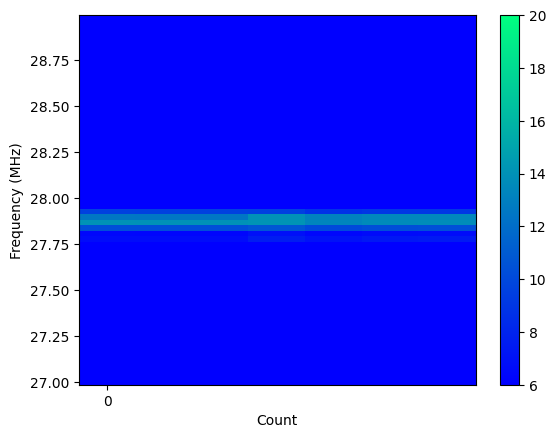

In [ ]:
#0V input, None
data = np.load(main_path+'/nano_30_16.npy')
noise = np.load(main_path+'/nano_0_noise.npy')

peak_freq = 27.9
ave_num = 100
deg=4

start_freq = 27
end_freq = 29


freq = noise[0]
dB = noise[1:ave_num+1]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[1:ave_num+1]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.3f} +- {:.3f}'.format(snr, std_snr))

heatmap_Qi = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_Qi.T, vmin=6, vmax=20, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(100, 67)
[peak] freq: 27.900000000000034, ave: 0.017, std: 0.001, max: 0.019
[noise] freq: 27.900000000000034, ave: 0.005, std: 0.006, max: 0.008,
[SNR] 9.494 +- 0.826


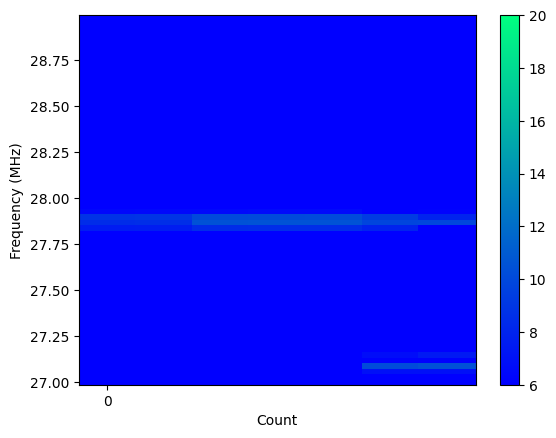

In [ ]:
#0V input, None
data = np.load(main_path+'/nano_30_17.npy')
noise = np.load(main_path+'/nano_0_noise.npy')

peak_freq = 27.9
ave_num = 100
deg=4

start_freq = 27
end_freq = 29


freq = noise[0]
dB = noise[1:ave_num+1]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[1:ave_num+1]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.3f} +- {:.3f}'.format(snr, std_snr))

heatmap_Qi = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_Qi.T, vmin=6, vmax=20, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(100, 67)
[peak] freq: 27.900000000000034, ave: 0.013, std: 0.001, max: 0.016
[noise] freq: 27.900000000000034, ave: 0.005, std: 0.006, max: 0.008,
[SNR] 6.437 +- 0.953


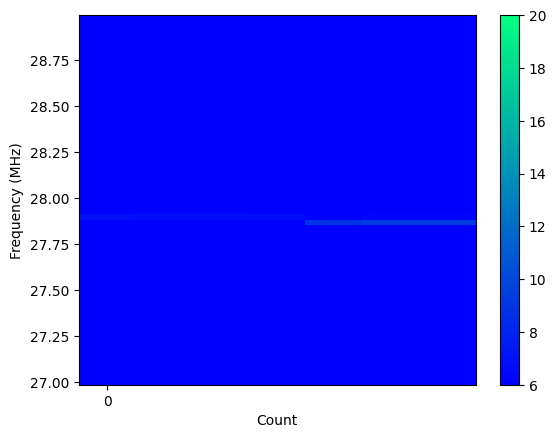

In [ ]:
#0V input, None
data = np.load(main_path+'/nano_30_18.npy')
noise = np.load(main_path+'/nano_0_noise.npy')

peak_freq = 27.9
ave_num = 100
deg=4

start_freq = 27
end_freq = 29


freq = noise[0]
dB = noise[1:ave_num+1]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[1:ave_num+1]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.3f} +- {:.3f}'.format(snr, std_snr))

heatmap_Qi = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_Qi.T, vmin=6, vmax=20, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(100, 67)
[peak] freq: 27.900000000000034, ave: 0.010, std: 0.001, max: 0.012
[noise] freq: 27.900000000000034, ave: 0.005, std: 0.006, max: 0.008,
[SNR] 4.173 +- 0.761


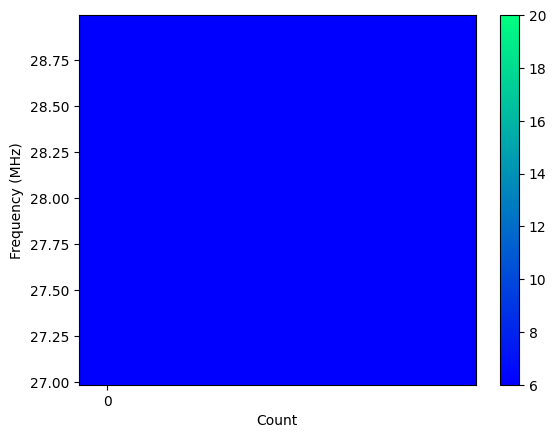

In [ ]:
#0V input, None
data = np.load(main_path+'/nano_30_19.npy')
noise = np.load(main_path+'/nano_0_noise.npy')

peak_freq = 27.9
ave_num = 100
deg=4

start_freq = 27
end_freq = 29


freq = noise[0]
dB = noise[1:ave_num+1]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[1:ave_num+1]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.3f} +- {:.3f}'.format(snr, std_snr))

heatmap_Qi = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_Qi.T, vmin=6, vmax=20, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(100, 67)
[peak] freq: 27.900000000000034, ave: 0.009, std: 0.001, max: 0.012
[noise] freq: 27.900000000000034, ave: 0.005, std: 0.006, max: 0.008,
[SNR] 3.194 +- 0.911


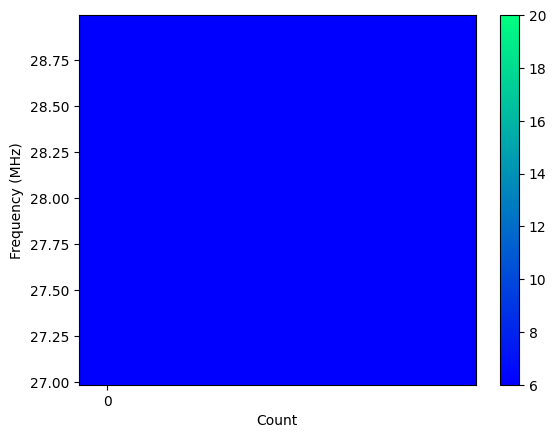

In [ ]:
#0V input, None
data = np.load(main_path+'/nano_30_20.npy')
noise = np.load(main_path+'/nano_0_noise.npy')

peak_freq = 27.9
ave_num = 100
deg=4

start_freq = 27
end_freq = 29


freq = noise[0]
dB = noise[1:ave_num+1]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[1:ave_num+1]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.3f} +- {:.3f}'.format(snr, std_snr))

heatmap_Qi = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_Qi.T, vmin=6, vmax=20, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(100, 67)
[peak] freq: 27.900000000000034, ave: 0.101, std: 0.001, max: 0.104
[noise] freq: 27.900000000000034, ave: 0.005, std: 0.006, max: 0.008,
[SNR] 78.660 +- 0.899


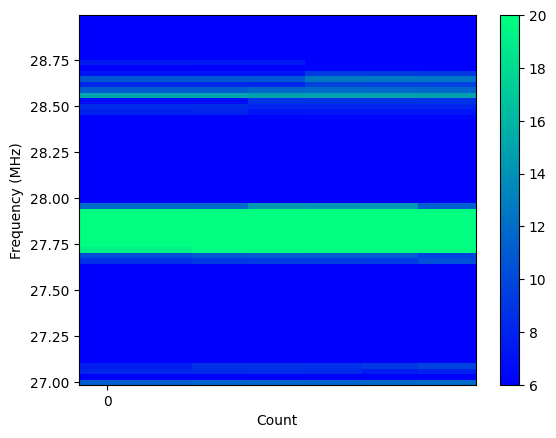

In [ ]:
#0V input, None
data = np.load(main_path+'/nano_60_10.npy')
noise = np.load(main_path+'/nano_0_noise.npy')

peak_freq = 27.9
ave_num = 100
deg=4

start_freq = 27
end_freq = 29


freq = noise[0]
dB = noise[1:ave_num+1]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[1:ave_num+1]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.3f} +- {:.3f}'.format(snr, std_snr))

heatmap_Qi = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_Qi.T, vmin=6, vmax=20, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(100, 67)
[peak] freq: 27.900000000000034, ave: 0.064, std: 0.001, max: 0.066
[noise] freq: 27.900000000000034, ave: 0.005, std: 0.006, max: 0.008,
[SNR] 48.136 +- 1.045


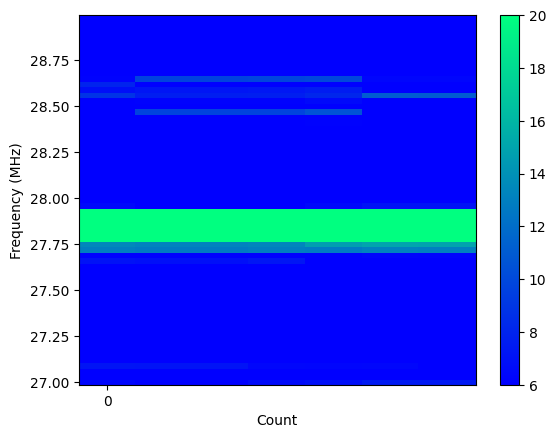

In [ ]:
#0V input, None
data = np.load(main_path+'/nano_60_11.npy')
noise = np.load(main_path+'/nano_0_noise.npy')

peak_freq = 27.9
ave_num = 100
deg=4

start_freq = 27
end_freq = 29


freq = noise[0]
dB = noise[1:ave_num+1]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[1:ave_num+1]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.3f} +- {:.3f}'.format(snr, std_snr))

heatmap_Qi = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_Qi.T, vmin=6, vmax=20, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(100, 67)
[peak] freq: 27.900000000000034, ave: 0.043, std: 0.001, max: 0.046
[noise] freq: 27.900000000000034, ave: 0.005, std: 0.006, max: 0.008,
[SNR] 30.716 +- 0.970


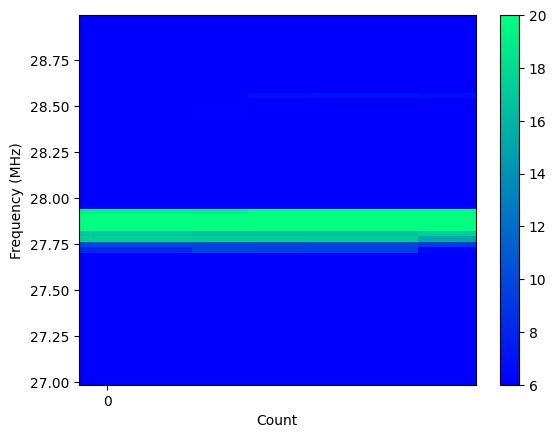

In [ ]:
#0V input, None
data = np.load(main_path+'/nano_60_12.npy')
noise = np.load(main_path+'/nano_0_noise.npy')

peak_freq = 27.9
ave_num = 100
deg=4

start_freq = 27
end_freq = 29


freq = noise[0]
dB = noise[1:ave_num+1]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[1:ave_num+1]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.3f} +- {:.3f}'.format(snr, std_snr))

heatmap_Qi = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_Qi.T, vmin=6, vmax=20, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(100, 67)
[peak] freq: 27.900000000000034, ave: 0.029, std: 0.001, max: 0.033
[noise] freq: 27.900000000000034, ave: 0.005, std: 0.006, max: 0.008,
[SNR] 19.447 +- 0.986


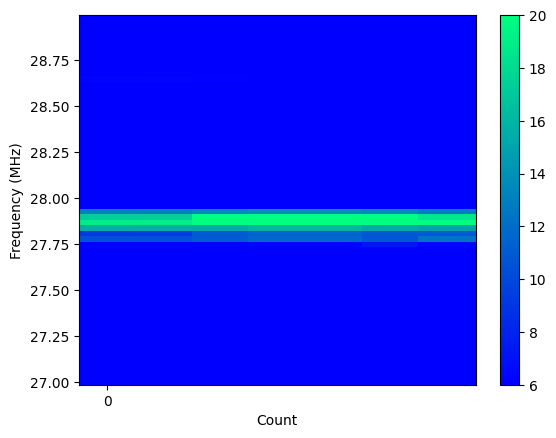

In [ ]:
#0V input, None
data = np.load(main_path+'/nano_60_13.npy')
noise = np.load(main_path+'/nano_0_noise.npy')

peak_freq = 27.9
ave_num = 100
deg=4

start_freq = 27
end_freq = 29


freq = noise[0]
dB = noise[1:ave_num+1]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[1:ave_num+1]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.3f} +- {:.3f}'.format(snr, std_snr))

heatmap_Qi = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_Qi.T, vmin=6, vmax=20, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(100, 67)
[peak] freq: 27.900000000000034, ave: 0.021, std: 0.001, max: 0.024
[noise] freq: 27.900000000000034, ave: 0.005, std: 0.006, max: 0.008,
[SNR] 12.662 +- 1.101


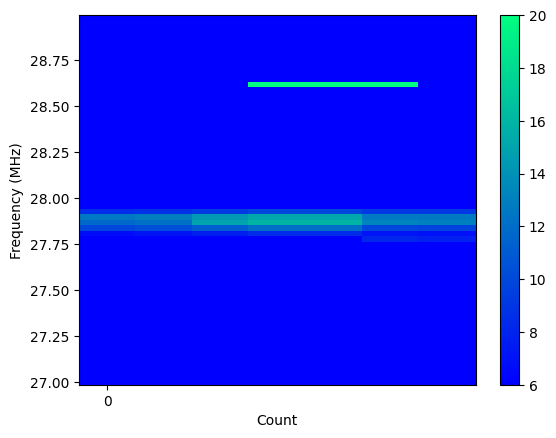

In [ ]:
#0V input, None
data = np.load(main_path+'/nano_60_14.npy')
noise = np.load(main_path+'/nano_0_noise.npy')

peak_freq = 27.9
ave_num = 100
deg=4

start_freq = 27
end_freq = 29


freq = noise[0]
dB = noise[1:ave_num+1]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[1:ave_num+1]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.3f} +- {:.3f}'.format(snr, std_snr))

heatmap_Qi = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_Qi.T, vmin=6, vmax=20, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(100, 67)
[peak] freq: 27.900000000000034, ave: 0.015, std: 0.002, max: 0.022
[noise] freq: 27.900000000000034, ave: 0.005, std: 0.006, max: 0.008,
[SNR] 8.407 +- 1.305


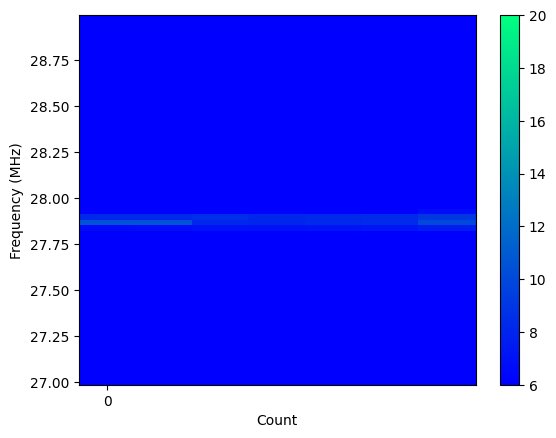

In [ ]:
#0V input, None
data = np.load(main_path+'/nano_60_15.npy')
noise = np.load(main_path+'/nano_0_noise.npy')

peak_freq = 27.9
ave_num = 100
deg=4

start_freq = 27
end_freq = 29


freq = noise[0]
dB = noise[1:ave_num+1]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[1:ave_num+1]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.3f} +- {:.3f}'.format(snr, std_snr))

heatmap_Qi = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_Qi.T, vmin=6, vmax=20, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(100, 67)
[peak] freq: 27.900000000000034, ave: 0.012, std: 0.001, max: 0.015
[noise] freq: 27.900000000000034, ave: 0.005, std: 0.006, max: 0.008,
[SNR] 5.255 +- 1.015


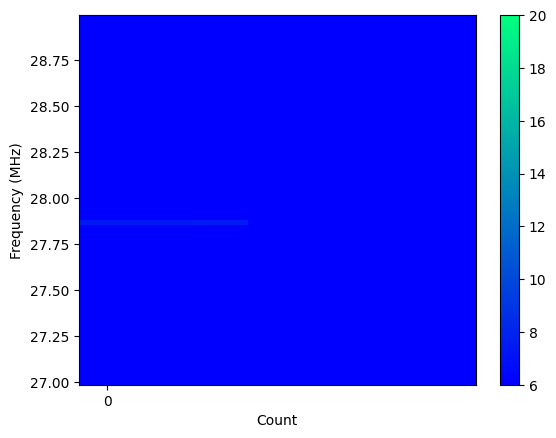

In [ ]:
#0V input, None
data = np.load(main_path+'/nano_60_16.npy')
noise = np.load(main_path+'/nano_0_noise.npy')

peak_freq = 27.9
ave_num = 100
deg=4

start_freq = 27
end_freq = 29


freq = noise[0]
dB = noise[1:ave_num+1]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[1:ave_num+1]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.3f} +- {:.3f}'.format(snr, std_snr))

heatmap_Qi = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_Qi.T, vmin=6, vmax=20, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(100, 67)
[peak] freq: 27.900000000000034, ave: 0.010, std: 0.001, max: 0.012
[noise] freq: 27.900000000000034, ave: 0.005, std: 0.006, max: 0.008,
[SNR] 3.529 +- 0.936


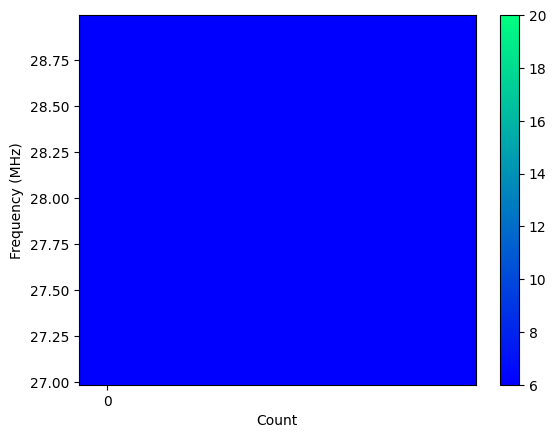

In [ ]:
#0V input, None
data = np.load(main_path+'/nano_60_17.npy')
noise = np.load(main_path+'/nano_0_noise.npy')

peak_freq = 27.9
ave_num = 100
deg=4

start_freq = 27
end_freq = 29


freq = noise[0]
dB = noise[1:ave_num+1]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[1:ave_num+1]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.3f} +- {:.3f}'.format(snr, std_snr))

heatmap_Qi = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_Qi.T, vmin=6, vmax=20, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(100, 67)
[peak] freq: 27.900000000000034, ave: 0.008, std: 0.001, max: 0.010
[noise] freq: 27.900000000000034, ave: 0.005, std: 0.006, max: 0.008,
[SNR] 1.910 +- 0.967


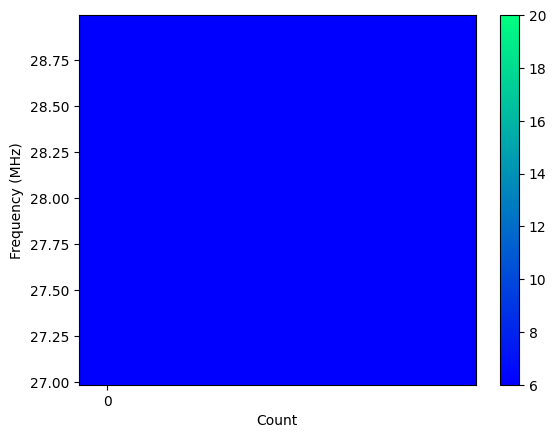

In [ ]:
#0V input, None
data = np.load(main_path+'/nano_60_18.npy')
noise = np.load(main_path+'/nano_0_noise.npy')

peak_freq = 27.9
ave_num = 100
deg=4

start_freq = 27
end_freq = 29


freq = noise[0]
dB = noise[1:ave_num+1]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[1:ave_num+1]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.3f} +- {:.3f}'.format(snr, std_snr))

heatmap_Qi = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_Qi.T, vmin=6, vmax=20, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(100, 67)
[peak] freq: 27.900000000000034, ave: 0.006, std: 0.001, max: 0.009
[noise] freq: 27.900000000000034, ave: 0.005, std: 0.006, max: 0.008,
[SNR] 1.033 +- 0.828


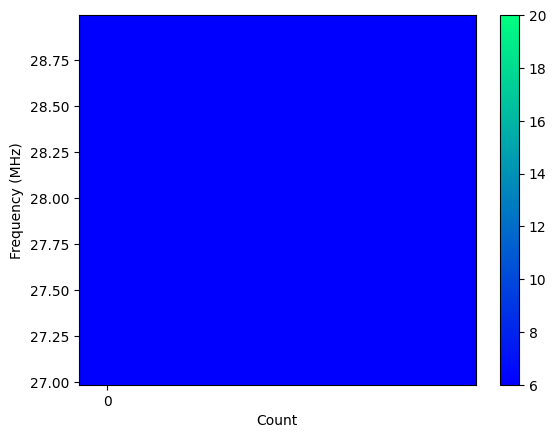

In [ ]:
#0V input, None
data = np.load(main_path+'/nano_60_19.npy')
noise = np.load(main_path+'/nano_0_noise.npy')

peak_freq = 27.9
ave_num = 100
deg=4

start_freq = 27
end_freq = 29


freq = noise[0]
dB = noise[1:ave_num+1]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[1:ave_num+1]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.3f} +- {:.3f}'.format(snr, std_snr))

heatmap_Qi = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_Qi.T, vmin=6, vmax=20, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(100, 67)
[peak] freq: 27.900000000000034, ave: 0.006, std: 0.001, max: 0.009
[noise] freq: 27.900000000000034, ave: 0.005, std: 0.006, max: 0.008,
[SNR] 0.672 +- 0.969


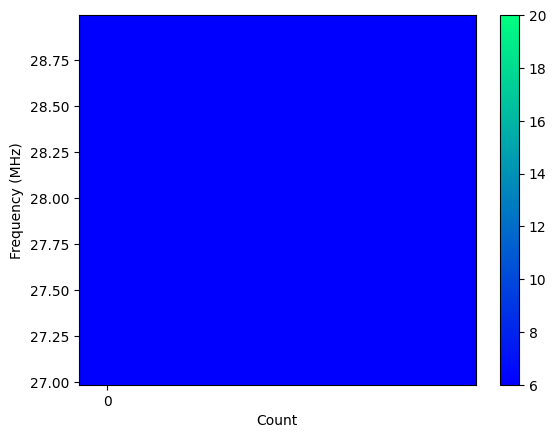

In [ ]:
#0V input, None
data = np.load(main_path+'/nano_60_20.npy')
noise = np.load(main_path+'/nano_0_noise.npy')

peak_freq = 27.9
ave_num = 100
deg=4

start_freq = 27
end_freq = 29


freq = noise[0]
dB = noise[1:ave_num+1]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[1:ave_num+1]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.3f} +- {:.3f}'.format(snr, std_snr))

heatmap_Qi = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_Qi.T, vmin=6, vmax=20, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(100, 67)
[peak] freq: 27.990000000000038, ave: 0.235, std: 0.001, max: 0.241
[noise] freq: 27.990000000000038, ave: 0.003, std: 0.006, max: 0.005,
[SNR] 179.204 +- 1.045


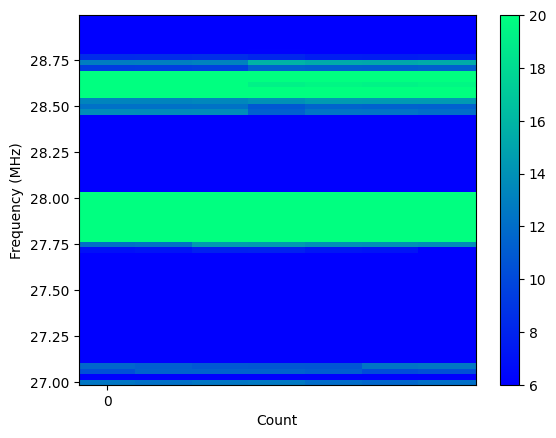

In [ ]:
#0V input, None
data = np.load(main_path+'/nano_30s_10.npy')
noise = np.load(main_path+'/nano_0_noise.npy')

peak_freq = 28
ave_num = 100
deg=4

start_freq = 27
end_freq = 29


freq = noise[0]
dB = noise[1:ave_num+1]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[1:ave_num+1]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.3f} +- {:.3f}'.format(snr, std_snr))

heatmap_Qi = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_Qi.T, vmin=6, vmax=20, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(100, 67)
[peak] freq: 27.990000000000038, ave: 0.137, std: 0.001, max: 0.140
[noise] freq: 27.990000000000038, ave: 0.003, std: 0.006, max: 0.005,
[SNR] 103.741 +- 0.931


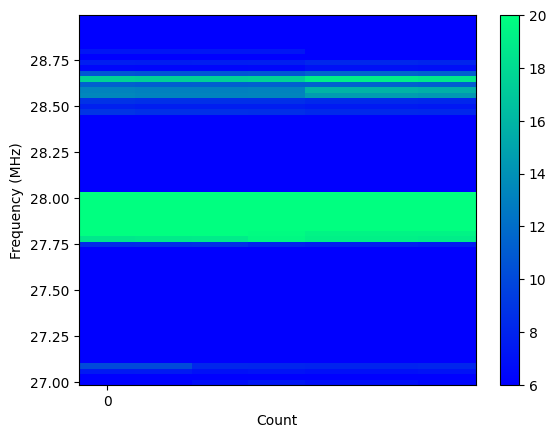

In [ ]:
#0V input, None
data = np.load(main_path+'/nano_30s_11.npy')
noise = np.load(main_path+'/nano_0_noise.npy')

peak_freq = 28
ave_num = 100
deg=4

start_freq = 27
end_freq = 29


freq = noise[0]
dB = noise[1:ave_num+1]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[1:ave_num+1]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.3f} +- {:.3f}'.format(snr, std_snr))

heatmap_Qi = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_Qi.T, vmin=6, vmax=20, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(100, 67)
[peak] freq: 27.990000000000038, ave: 0.088, std: 0.001, max: 0.090
[noise] freq: 27.990000000000038, ave: 0.003, std: 0.006, max: 0.005,
[SNR] 66.103 +- 0.482


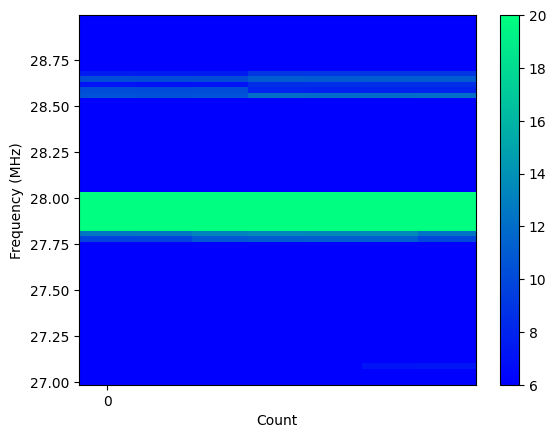

In [ ]:
#0V input, None
data = np.load(main_path+'/nano_30s_12.npy')
noise = np.load(main_path+'/nano_0_noise.npy')

peak_freq = 28
ave_num = 100
deg=4

start_freq = 27
end_freq = 29


freq = noise[0]
dB = noise[1:ave_num+1]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[1:ave_num+1]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.3f} +- {:.3f}'.format(snr, std_snr))

heatmap_Qi = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_Qi.T, vmin=6, vmax=20, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(100, 67)
[peak] freq: 27.990000000000038, ave: 0.059, std: 0.001, max: 0.061
[noise] freq: 27.990000000000038, ave: 0.003, std: 0.006, max: 0.005,
[SNR] 43.184 +- 0.798


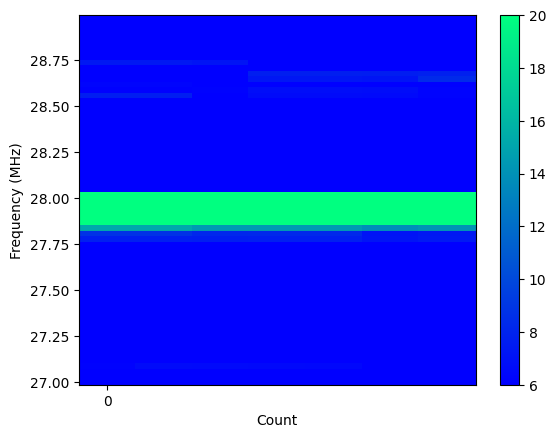

In [ ]:
#0V input, None
data = np.load(main_path+'/nano_30s_13.npy')
noise = np.load(main_path+'/nano_0_noise.npy')

peak_freq = 28
deg=4

start_freq = 27
end_freq = 29


freq = noise[0]
dB = noise[1:ave_num+1]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[1:ave_num+1]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.3f} +- {:.3f}'.format(snr, std_snr))

heatmap_Qi = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_Qi.T, vmin=6, vmax=20, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(100, 67)
[peak] freq: 27.990000000000038, ave: 0.040, std: 0.001, max: 0.043
[noise] freq: 27.990000000000038, ave: 0.003, std: 0.006, max: 0.005,
[SNR] 28.827 +- 0.933


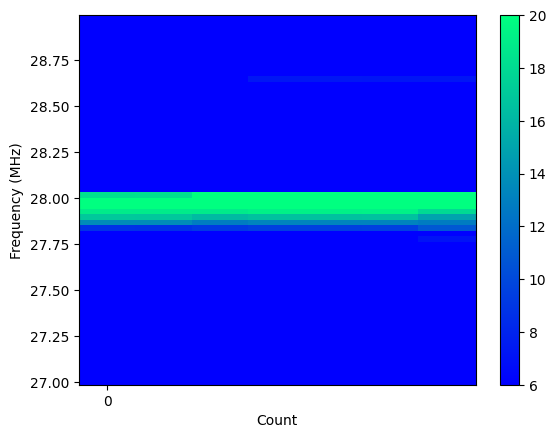

In [ ]:
#0V input, None
data = np.load(main_path+'/nano_30s_14.npy')
noise = np.load(main_path+'/nano_0_noise.npy')

peak_freq = 28
ave_num = 100
deg=4

start_freq = 27
end_freq = 29


freq = noise[0]
dB = noise[1:ave_num+1]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[1:ave_num+1]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.3f} +- {:.3f}'.format(snr, std_snr))

heatmap_Qi = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_Qi.T, vmin=6, vmax=20, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(100, 67)
[peak] freq: 27.990000000000038, ave: 0.029, std: 0.001, max: 0.030
[noise] freq: 27.990000000000038, ave: 0.003, std: 0.006, max: 0.005,
[SNR] 20.005 +- 0.873


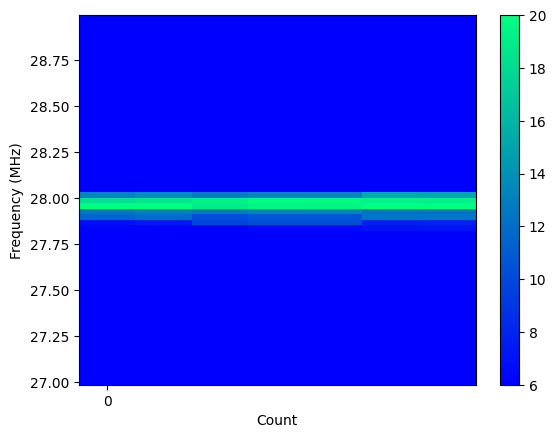

In [ ]:
#0V input, None
data = np.load(main_path+'/nano_30s_15.npy')
noise = np.load(main_path+'/nano_0_noise.npy')

peak_freq = 28
ave_num = 100
deg=4

start_freq = 27
end_freq = 29


freq = noise[0]
dB = noise[1:ave_num+1]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[1:ave_num+1]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.3f} +- {:.3f}'.format(snr, std_snr))

heatmap_Qi = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_Qi.T, vmin=6, vmax=20, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(100, 67)
[peak] freq: 27.990000000000038, ave: 0.021, std: 0.001, max: 0.023
[noise] freq: 27.990000000000038, ave: 0.003, std: 0.006, max: 0.005,
[SNR] 13.971 +- 0.862


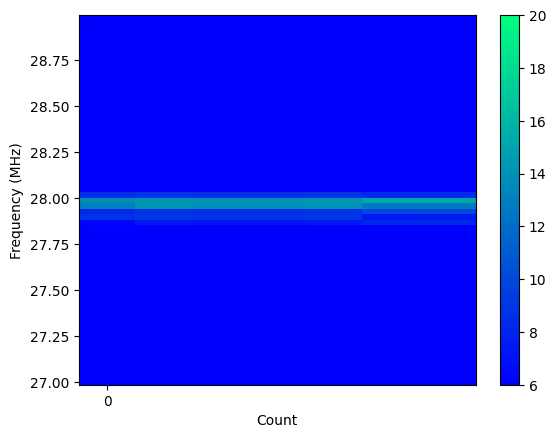

In [ ]:
#0V input, None
data = np.load(main_path+'/nano_30s_16.npy')
noise = np.load(main_path+'/nano_0_noise.npy')

peak_freq = 28
ave_num = 100
deg=4

start_freq = 27
end_freq = 29


freq = noise[0]
dB = noise[1:ave_num+1]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[1:ave_num+1]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.3f} +- {:.3f}'.format(snr, std_snr))

heatmap_Qi = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_Qi.T, vmin=6, vmax=20, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(100, 67)
[peak] freq: 27.990000000000038, ave: 0.015, std: 0.001, max: 0.017
[noise] freq: 27.990000000000038, ave: 0.003, std: 0.006, max: 0.005,
[SNR] 9.723 +- 0.882


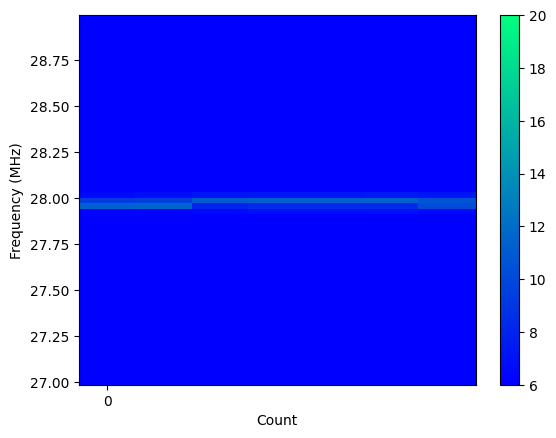

In [ ]:
#0V input, None
data = np.load(main_path+'/nano_30s_17.npy')
noise = np.load(main_path+'/nano_0_noise.npy')

peak_freq = 28
ave_num = 100
deg=4

start_freq = 27
end_freq = 29


freq = noise[0]
dB = noise[1:ave_num+1]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[1:ave_num+1]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.3f} +- {:.3f}'.format(snr, std_snr))

heatmap_Qi = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_Qi.T, vmin=6, vmax=20, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(100, 67)
[peak] freq: 27.990000000000038, ave: 0.012, std: 0.002, max: 0.018
[noise] freq: 27.990000000000038, ave: 0.003, std: 0.006, max: 0.005,
[SNR] 7.345 +- 1.217


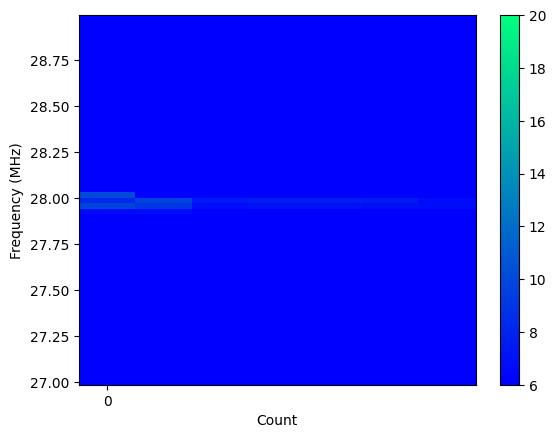

In [ ]:
#0V input, None
data = np.load(main_path+'/nano_30s_18.npy')
noise = np.load(main_path+'/nano_0_noise.npy')

peak_freq = 28
ave_num = 100
deg=4

start_freq = 27
end_freq = 29


freq = noise[0]
dB = noise[1:ave_num+1]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[1:ave_num+1]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.3f} +- {:.3f}'.format(snr, std_snr))

heatmap_Qi = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_Qi.T, vmin=6, vmax=20, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(100, 67)
[peak] freq: 27.990000000000038, ave: 0.009, std: 0.001, max: 0.010
[noise] freq: 27.990000000000038, ave: 0.003, std: 0.006, max: 0.005,
[SNR] 4.690 +- 0.465


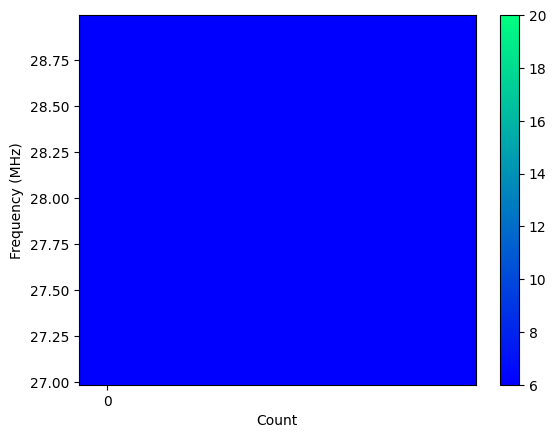

In [ ]:
#0V input, None
data = np.load(main_path+'/nano_30s_19.npy')
noise = np.load(main_path+'/nano_0_noise.npy')

peak_freq = 28
ave_num = 100
deg=4

start_freq = 27
end_freq = 29


freq = noise[0]
dB = noise[1:ave_num+1]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[1:ave_num+1]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.3f} +- {:.3f}'.format(snr, std_snr))

heatmap_Qi = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_Qi.T, vmin=6, vmax=20, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(100, 67)
[peak] freq: 27.990000000000038, ave: 0.007, std: 0.001, max: 0.009
[noise] freq: 27.990000000000038, ave: 0.003, std: 0.006, max: 0.005,
[SNR] 3.567 +- 0.608


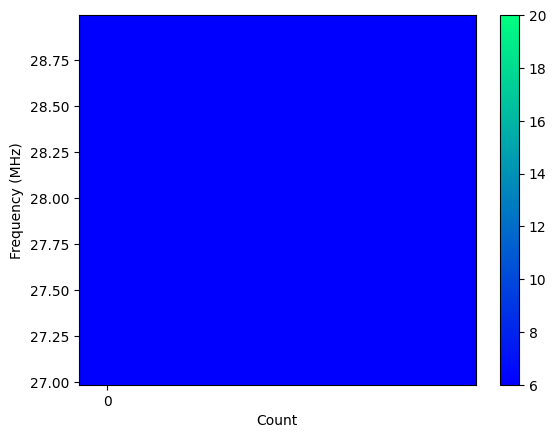

In [ ]:
#0V input, None
data = np.load(main_path+'/nano_30s_20.npy')
noise = np.load(main_path+'/nano_0_noise.npy')

peak_freq = 28
ave_num = 100
deg=4

start_freq = 27
end_freq = 29


freq = noise[0]
dB = noise[1:ave_num+1]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[1:ave_num+1]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.3f} +- {:.3f}'.format(snr, std_snr))

heatmap_Qi = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_Qi.T, vmin=6, vmax=20, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(100, 67)
[peak] freq: 27.900000000000034, ave: 0.198, std: 0.005, max: 0.221
[noise] freq: 27.900000000000034, ave: 0.005, std: 0.006, max: 0.008,
[SNR] 158.024 +- 3.688


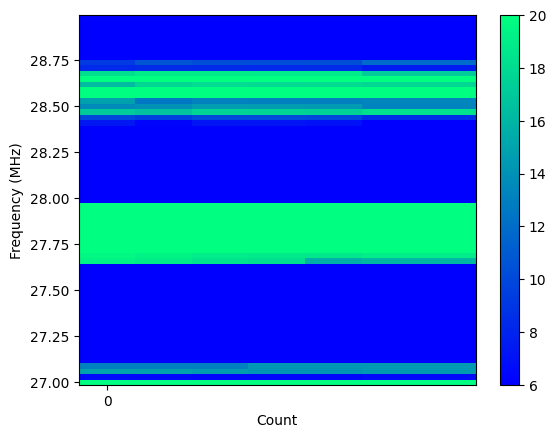

In [ ]:
#0V input, None
data = np.load(main_path+'/nano_-30_10.npy')
noise = np.load(main_path+'/nano_0_noise.npy')

peak_freq = 27.9
ave_num = 100
deg=4

start_freq = 27
end_freq = 29


freq = noise[0]
dB = noise[1:ave_num+1]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[1:ave_num+1]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.3f} +- {:.3f}'.format(snr, std_snr))

heatmap_Qi = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_Qi.T, vmin=6, vmax=20, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(100, 67)
[peak] freq: 27.900000000000034, ave: 0.123, std: 0.001, max: 0.125
[noise] freq: 27.900000000000034, ave: 0.005, std: 0.006, max: 0.008,
[SNR] 96.075 +- 1.028


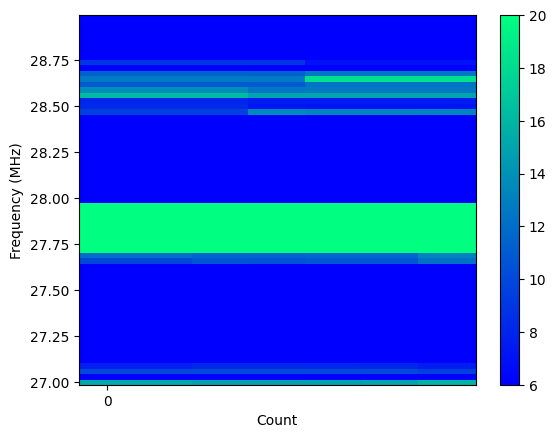

In [ ]:
#0V input, None
data = np.load(main_path+'/nano_-30_11.npy')
noise = np.load(main_path+'/nano_0_noise.npy')

peak_freq = 27.9
ave_num = 100
deg=4

start_freq = 27
end_freq = 29


freq = noise[0]
dB = noise[1:ave_num+1]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[1:ave_num+1]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.3f} +- {:.3f}'.format(snr, std_snr))

heatmap_Qi = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_Qi.T, vmin=6, vmax=20, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(100, 67)
[peak] freq: 27.900000000000034, ave: 0.078, std: 0.001, max: 0.080
[noise] freq: 27.900000000000034, ave: 0.005, std: 0.006, max: 0.008,
[SNR] 59.957 +- 0.755


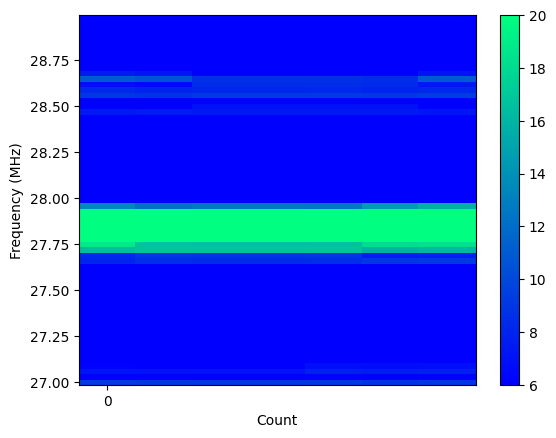

In [ ]:
#0V input, None
data = np.load(main_path+'/nano_-30_12.npy')
noise = np.load(main_path+'/nano_0_noise.npy')

peak_freq = 27.9
ave_num = 100
deg=4

start_freq = 27
end_freq = 29


freq = noise[0]
dB = noise[1:ave_num+1]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[1:ave_num+1]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.3f} +- {:.3f}'.format(snr, std_snr))

heatmap_Qi = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_Qi.T, vmin=6, vmax=20, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(100, 67)
[peak] freq: 27.900000000000034, ave: 0.052, std: 0.001, max: 0.054
[noise] freq: 27.900000000000034, ave: 0.005, std: 0.006, max: 0.008,
[SNR] 38.115 +- 0.878


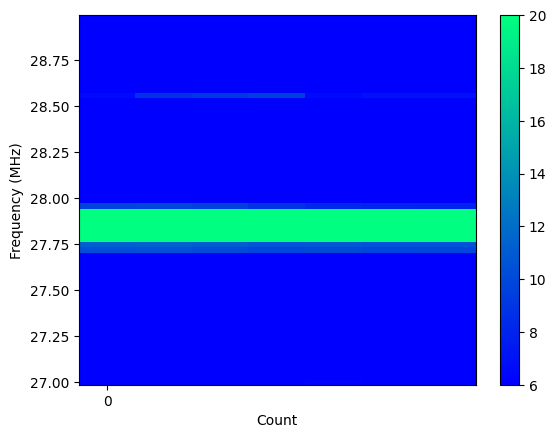

In [ ]:
#0V input, None
data = np.load(main_path+'/nano_-30_13.npy')
noise = np.load(main_path+'/nano_0_noise.npy')

peak_freq = 27.9
ave_num = 100
deg=4

start_freq = 27
end_freq = 29


freq = noise[0]
dB = noise[1:ave_num+1]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[1:ave_num+1]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.3f} +- {:.3f}'.format(snr, std_snr))

heatmap_Qi = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_Qi.T, vmin=6, vmax=20, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(100, 67)
[peak] freq: 27.900000000000034, ave: 0.036, std: 0.001, max: 0.038
[noise] freq: 27.900000000000034, ave: 0.005, std: 0.006, max: 0.008,
[SNR] 25.572 +- 0.856


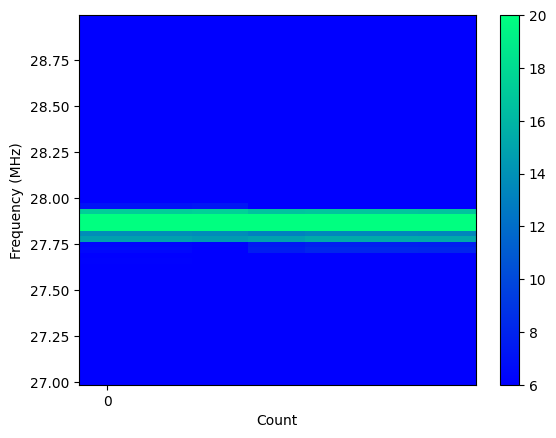

In [ ]:
#0V input, None
data = np.load(main_path+'/nano_-30_14.npy')
noise = np.load(main_path+'/nano_0_noise.npy')

peak_freq = 27.9
ave_num = 100
deg=4

start_freq = 27
end_freq = 29


freq = noise[0]
dB = noise[1:ave_num+1]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[1:ave_num+1]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.3f} +- {:.3f}'.format(snr, std_snr))

heatmap_Qi = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_Qi.T, vmin=6, vmax=20, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(100, 67)
[peak] freq: 27.900000000000034, ave: 0.026, std: 0.001, max: 0.027
[noise] freq: 27.900000000000034, ave: 0.005, std: 0.006, max: 0.008,
[SNR] 16.777 +- 0.718


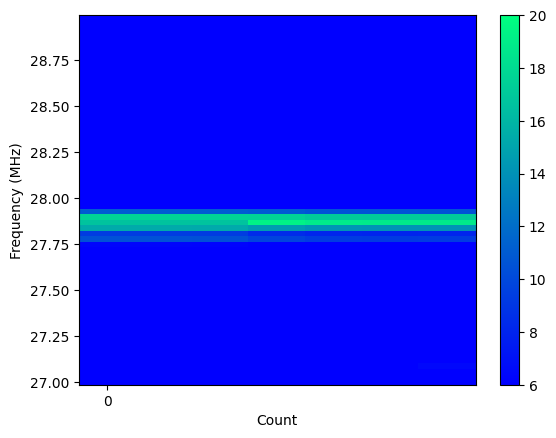

In [ ]:
#0V input, None
data = np.load(main_path+'/nano_-30_15.npy')
noise = np.load(main_path+'/nano_0_noise.npy')

peak_freq = 27.9
ave_num = 100
deg=4

start_freq = 27
end_freq = 29


freq = noise[0]
dB = noise[1:ave_num+1]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[1:ave_num+1]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.3f} +- {:.3f}'.format(snr, std_snr))

heatmap_Qi = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_Qi.T, vmin=6, vmax=20, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(100, 67)
[peak] freq: 27.900000000000034, ave: 0.020, std: 0.001, max: 0.022
[noise] freq: 27.900000000000034, ave: 0.005, std: 0.006, max: 0.008,
[SNR] 11.699 +- 0.825


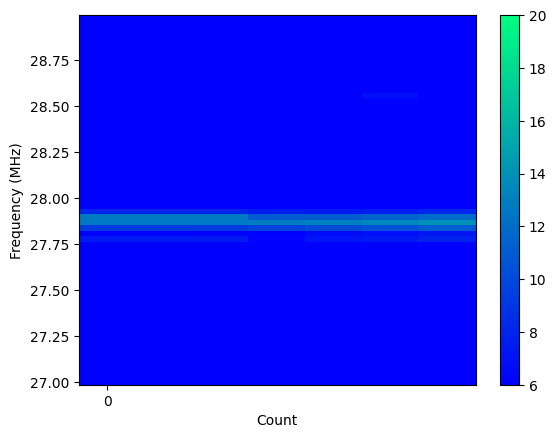

In [ ]:
#0V input, None
data = np.load(main_path+'/nano_-30_16.npy')
noise = np.load(main_path+'/nano_0_noise.npy')

peak_freq = 27.9
ave_num = 100
deg=4

start_freq = 27
end_freq = 29


freq = noise[0]
dB = noise[1:ave_num+1]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[1:ave_num+1]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.3f} +- {:.3f}'.format(snr, std_snr))

heatmap_Qi = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_Qi.T, vmin=6, vmax=20, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(100, 67)
[peak] freq: 27.900000000000034, ave: 0.015, std: 0.001, max: 0.018
[noise] freq: 27.900000000000034, ave: 0.005, std: 0.006, max: 0.008,
[SNR] 7.900 +- 0.901


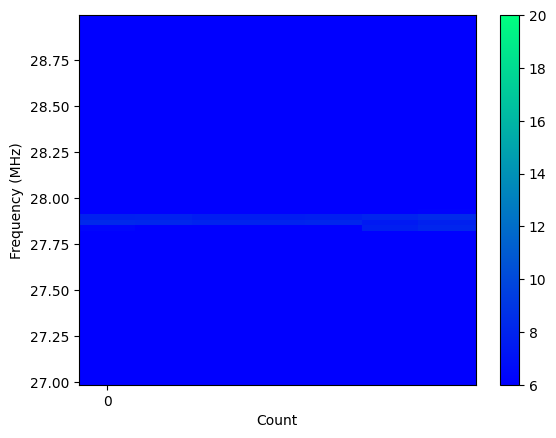

In [ ]:
#0V input, None
data = np.load(main_path+'/nano_-30_17.npy')
noise = np.load(main_path+'/nano_0_noise.npy')

peak_freq = 27.9
ave_num = 100
deg=4

start_freq = 27
end_freq = 29


freq = noise[0]
dB = noise[1:ave_num+1]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[1:ave_num+1]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.3f} +- {:.3f}'.format(snr, std_snr))

heatmap_Qi = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_Qi.T, vmin=6, vmax=20, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(100, 67)
[peak] freq: 27.900000000000034, ave: 0.012, std: 0.001, max: 0.014
[noise] freq: 27.900000000000034, ave: 0.005, std: 0.006, max: 0.008,
[SNR] 5.290 +- 0.876


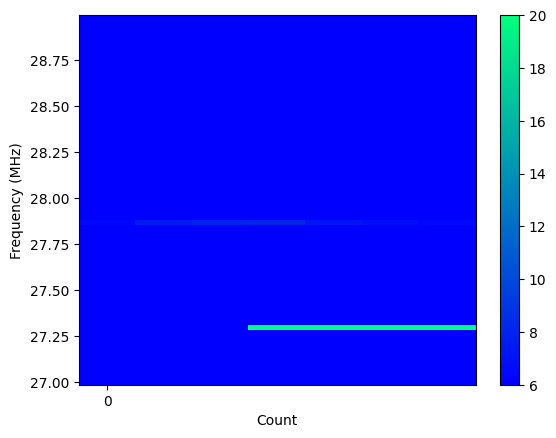

In [ ]:
#0V input, None
data = np.load(main_path+'/nano_-30_18.npy')
noise = np.load(main_path+'/nano_0_noise.npy')

peak_freq = 27.9
ave_num = 100
deg=4

start_freq = 27
end_freq = 29


freq = noise[0]
dB = noise[1:ave_num+1]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[1:ave_num+1]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.3f} +- {:.3f}'.format(snr, std_snr))

heatmap_Qi = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_Qi.T, vmin=6, vmax=20, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(100, 67)
[peak] freq: 27.900000000000034, ave: 0.009, std: 0.001, max: 0.012
[noise] freq: 27.900000000000034, ave: 0.005, std: 0.006, max: 0.008,
[SNR] 3.310 +- 0.987


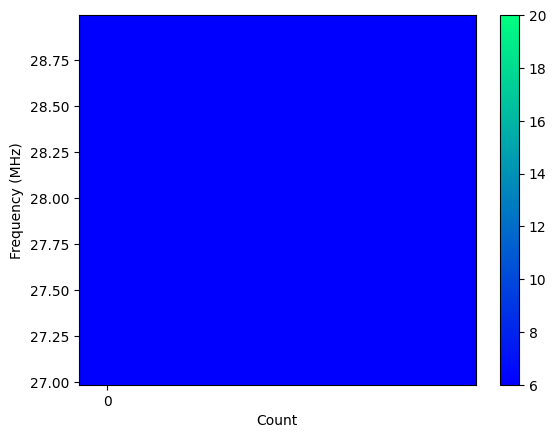

In [ ]:
#0V input, None
data = np.load(main_path+'/nano_-30_19.npy')
noise = np.load(main_path+'/nano_0_noise.npy')

peak_freq = 27.9
ave_num = 100
deg=4

start_freq = 27
end_freq = 29


freq = noise[0]
dB = noise[1:ave_num+1]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[1:ave_num+1]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.3f} +- {:.3f}'.format(snr, std_snr))

heatmap_Qi = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_Qi.T, vmin=6, vmax=20, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(100, 67)
[peak] freq: 27.900000000000034, ave: 0.008, std: 0.001, max: 0.011
[noise] freq: 27.900000000000034, ave: 0.005, std: 0.006, max: 0.008,
[SNR] 2.290 +- 0.919


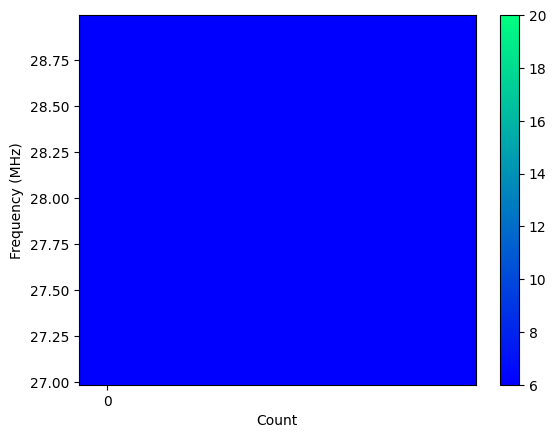

In [ ]:
#0V input, None
data = np.load(main_path+'/nano_-30_20.npy')
noise = np.load(main_path+'/nano_0_noise.npy')

peak_freq = 27.9
ave_num = 100
deg=4

start_freq = 27
end_freq = 29


freq = noise[0]
dB = noise[1:ave_num+1]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[1:ave_num+1]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.3f} +- {:.3f}'.format(snr, std_snr))

heatmap_Qi = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_Qi.T, vmin=6, vmax=20, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(100, 67)
[peak] freq: 27.900000000000034, ave: 0.137, std: 0.001, max: 0.145
[noise] freq: 27.900000000000034, ave: 0.005, std: 0.006, max: 0.008,
[SNR] 107.510 +- 1.223


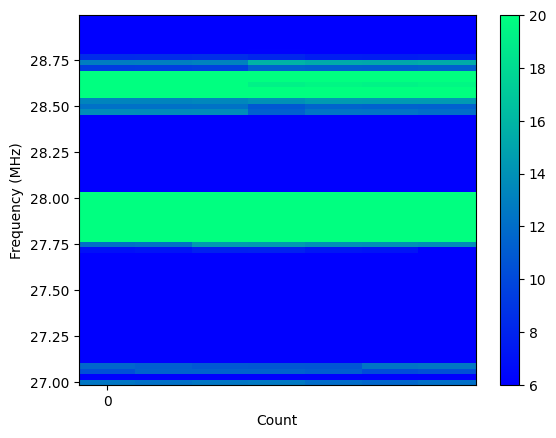

In [ ]:
#0V input, None
data = np.load(main_path+'/nano_30s_10.npy')
noise = np.load(main_path+'/nano_0_noise.npy')

peak_freq = 27.9
ave_num = 100
deg=4

start_freq = 27
end_freq = 29


freq = noise[0]
dB = noise[1:ave_num+1]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[1:ave_num+1]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.3f} +- {:.3f}'.format(snr, std_snr))

heatmap_Qi = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_Qi.T, vmin=6, vmax=20, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(100, 67)
[peak] freq: 27.900000000000034, ave: 0.087, std: 0.001, max: 0.088
[noise] freq: 27.900000000000034, ave: 0.005, std: 0.006, max: 0.008,
[SNR] 66.562 +- 0.762


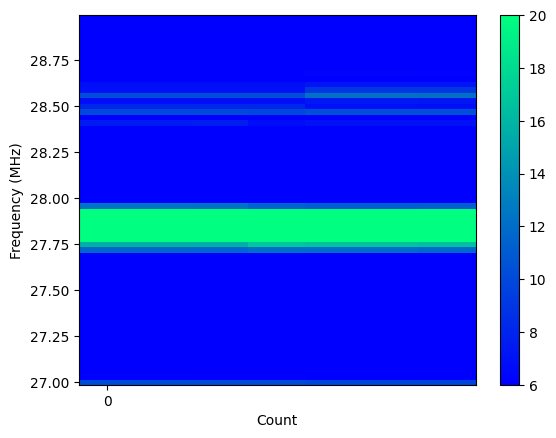

In [ ]:
#0V input, None
data = np.load(main_path+'/nano_0_13_2mA.npy')
noise = np.load(main_path+'/nano_0_noise.npy')

peak_freq = 27.9
ave_num = 100
deg=4

start_freq = 27
end_freq = 29


freq = noise[0]
dB = noise[1:ave_num+1]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[1:ave_num+1]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.3f} +- {:.3f}'.format(snr, std_snr))

heatmap_Qi = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_Qi.T, vmin=6, vmax=20, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(100, 67)
[peak] freq: 27.900000000000034, ave: 0.053, std: 0.027, max: 0.091
[noise] freq: 27.900000000000034, ave: 0.005, std: 0.006, max: 0.008,
[SNR] 39.384 +- 22.246


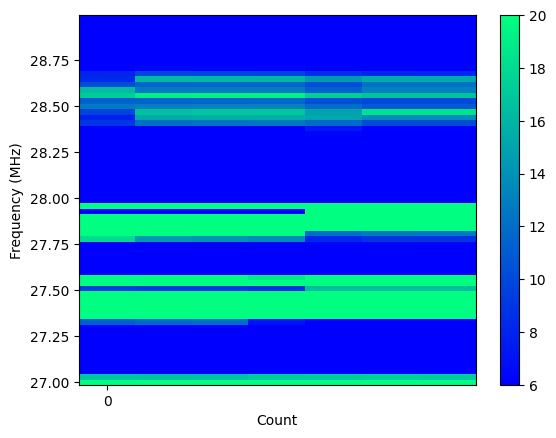

In [ ]:
#0V input, None
data = np.load(main_path+'/nano_0_13_4mA.npy')
noise = np.load(main_path+'/nano_0_noise.npy')

peak_freq = 27.9
ave_num = 100
deg=4

start_freq = 27
end_freq = 29


freq = noise[0]
dB = noise[1:ave_num+1]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[1:ave_num+1]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.3f} +- {:.3f}'.format(snr, std_snr))

heatmap_Qi = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_Qi.T, vmin=6, vmax=20, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(100, 67)
[peak] freq: 27.900000000000034, ave: 0.089, std: 0.002, max: 0.092
[noise] freq: 27.900000000000034, ave: 0.005, std: 0.006, max: 0.008,
[SNR] 68.275 +- 1.666


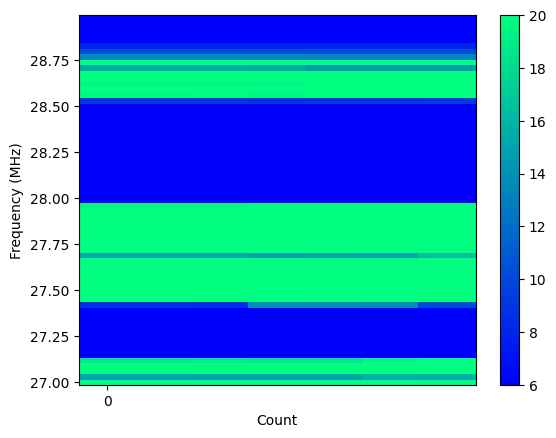

In [ ]:
#0V input, None
data = np.load(main_path+'/nano_0_13_6mA.npy')
noise = np.load(main_path+'/nano_0_noise.npy')

peak_freq = 27.9
ave_num = 100
deg=4

start_freq = 27
end_freq = 29


freq = noise[0]
dB = noise[1:ave_num+1]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[1:ave_num+1]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.3f} +- {:.3f}'.format(snr, std_snr))

heatmap_Qi = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_Qi.T, vmin=6, vmax=20, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(100, 67)
[peak] freq: 27.900000000000034, ave: 0.214, std: 0.019, max: 0.243
[noise] freq: 27.900000000000034, ave: 0.005, std: 0.006, max: 0.008,
[SNR] 170.960 +- 15.605


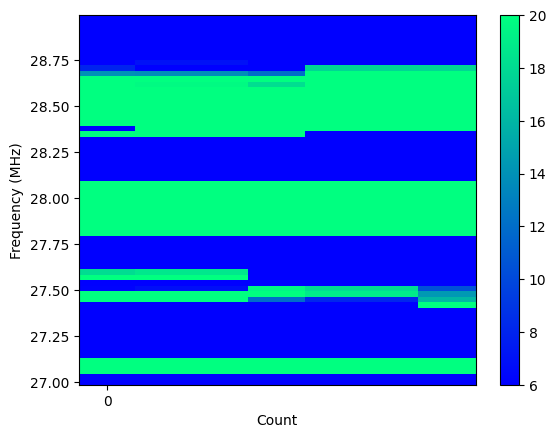

In [ ]:
#0V input, None
data = np.load(main_path+'/nano_0_13_8mA.npy')
noise = np.load(main_path+'/nano_0_noise.npy')

peak_freq = 27.9
ave_num = 100
deg=4

start_freq = 27
end_freq = 29


freq = noise[0]
dB = noise[1:ave_num+1]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[1:ave_num+1]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.3f} +- {:.3f}'.format(snr, std_snr))

heatmap_Qi = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_Qi.T, vmin=6, vmax=20, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

In [ ]:
import os
import numpy as np

def process_data_file(data_file, noise, peak_freq, ave_num, deg, start_freq, end_freq):
    data = np.load(data_file)

    freq = noise[0]
    dB = noise[1:ave_num+1]
    target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

    noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)

    freq = data[0]
    dB = data[1:ave_num+1]
    data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

    id = (np.abs(freq[target_ids] - peak_freq)).argmin()
    x = freq[target_ids]

    print(f'[{os.path.basename(data_file)}] [peak] freq: {x[id]}, ave: {data_diff_ave[id]:.3f}, std: {data_diff_std[id]:.3f}, max: {data_diff_max[id]:.3f}')
    print(f'[{os.path.basename(data_file)}] [noise] freq: {x[id]}, ave: {noise_diff_ave[id]:.3f}, std: {noise_std_max:.3f}, max: {noise_diff_max[id]:.3f}')

    snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
    snr = snr / noise_diff_std[id]
    std_snr = data_diff_std[id] / noise_diff_std[id]
    snr_result = f'[{os.path.basename(data_file)}] [SNR] {snr:.3f} +- {std_snr:.3f}'
    print(snr_result)

    return snr_result


noise = np.load(os.path.join(main_path, 'nano_0_noise.npy'))

ave_num = 100
deg = 4
start_freq = 27
end_freq = 29

results = {}

for filename in os.listdir(main_path):
    if filename.startswith('nano_') and filename.endswith('.npy') and 'noise' not in filename:
        data_file = os.path.join(main_path, filename)

        # Check if the file starts with 'nano_30s' to adjust peak_freq
        if filename.startswith('nano_30s'):
            peak_freq = 28.0
        else:
            peak_freq = 27.9

        snr_result = process_data_file(data_file, noise, peak_freq, ave_num, deg, start_freq, end_freq)
        results[filename] = snr_result

# Sort results by filename
sorted_filenames = sorted(results.keys())

# Save results to a file
with open(os.path.join(main_path, 'snr_results.txt'), 'w') as f:
    for filename in sorted_filenames:
        f.write(f'{results[filename]}\n')


(100, 67)
[nano_0_10.npy] [peak] freq: 27.900000000000034, ave: 0.369, std: 0.002, max: 0.372
[nano_0_10.npy] [noise] freq: 27.900000000000034, ave: 0.005, std: 0.006, max: 0.008
[nano_0_10.npy] [SNR] 298.005 +- 1.289
(100, 67)
[nano_0_11.npy] [peak] freq: 27.900000000000034, ave: 0.221, std: 0.001, max: 0.223
[nano_0_11.npy] [noise] freq: 27.900000000000034, ave: 0.005, std: 0.006, max: 0.008
[nano_0_11.npy] [SNR] 176.770 +- 0.995
(100, 67)
[nano_0_14.npy] [peak] freq: 27.900000000000034, ave: 0.062, std: 0.001, max: 0.065
[nano_0_14.npy] [noise] freq: 27.900000000000034, ave: 0.005, std: 0.006, max: 0.008
[nano_0_14.npy] [SNR] 46.888 +- 0.769
(100, 67)
[nano_0_13.npy] [peak] freq: 27.900000000000034, ave: 0.091, std: 0.001, max: 0.094
[nano_0_13.npy] [noise] freq: 27.900000000000034, ave: 0.005, std: 0.006, max: 0.008
[nano_0_13.npy] [SNR] 70.404 +- 0.944
(100, 67)
[nano_0_12.npy] [peak] freq: 27.900000000000034, ave: 0.140, std: 0.001, max: 0.143
[nano_0_12.npy] [noise] freq: 27.900

(100, 67)
[peak] freq: 27.900000000000034, ave: 0.045, std: 0.001, max: 0.047
[noise] freq: 27.900000000000034, ave: 0.002, std: 0.004, max: 0.004,
[SNR] 56.980 +- 0.856


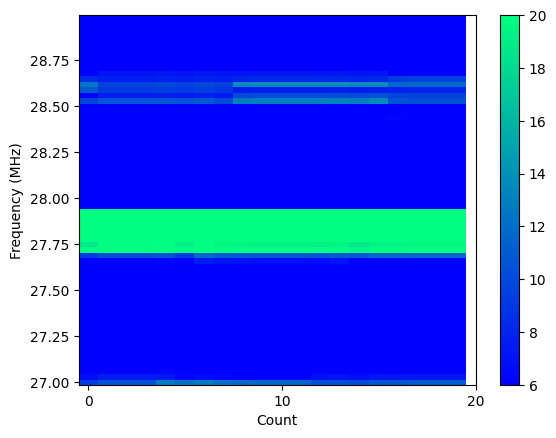

In [ ]:
#0V input, None
data = np.load(main_path+'/nano_2mA_30_13.npy')
noise = np.load(main_path+'/nano_2mA_noise.npy')

peak_freq = 27.9
ave_num = 100
deg=4

start_freq = 27
end_freq = 29


freq = noise[0]
dB = noise[1:ave_num+1]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[1:ave_num+1]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.3f} +- {:.3f}'.format(snr, std_snr))

heatmap_Qi = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_Qi.T, vmin=6, vmax=20, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(100, 67)
[peak] freq: 27.900000000000034, ave: 0.021, std: 0.001, max: 0.023
[noise] freq: 27.900000000000034, ave: -0.021, std: 0.006, max: -0.019,
[SNR] 42.757 +- 1.122


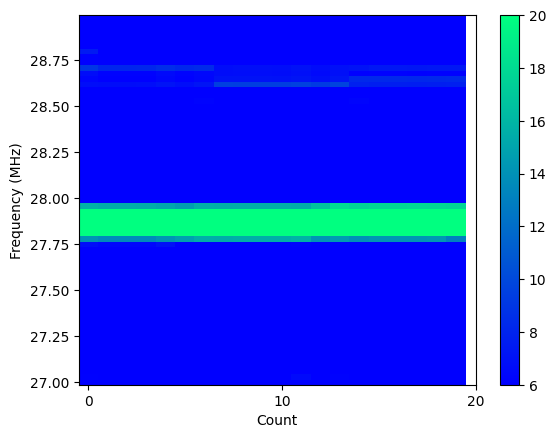

In [ ]:
#0V input, None
data = np.load(main_path+'/nano_4mA_30_13.npy')
noise = np.load(main_path+'/nano_4mA_noise.npy')

peak_freq = 27.9
ave_num = 100
deg=4

start_freq = 27
end_freq = 29


freq = noise[0]
dB = noise[1:ave_num+1]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[1:ave_num+1]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.3f} +- {:.3f}'.format(snr, std_snr))

heatmap_Qi = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_Qi.T, vmin=6, vmax=20, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(100, 67)
[peak] freq: 27.900000000000034, ave: 0.027, std: 0.001, max: 0.028
[noise] freq: 27.900000000000034, ave: 0.004, std: 0.004, max: 0.005,
[SNR] 36.117 +- 1.270


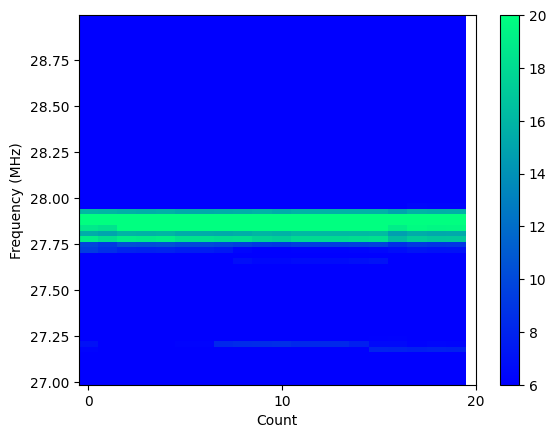

In [ ]:
#0V input, None
data = np.load(main_path+'/nano_6mA_30_13.npy')
noise = np.load(main_path+'/nano_6mA_noise.npy')

peak_freq = 27.9
ave_num = 100
deg=4

start_freq = 27
end_freq = 29


freq = noise[0]
dB = noise[1:ave_num+1]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[1:ave_num+1]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.3f} +- {:.3f}'.format(snr, std_snr))

heatmap_Qi = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_Qi.T, vmin=6, vmax=20, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(100, 67)
[peak] freq: 27.900000000000034, ave: 0.186, std: 0.015, max: 0.222
[noise] freq: 27.900000000000034, ave: 0.158, std: 0.156, max: 0.232,
[SNR] 0.736 +- 0.410


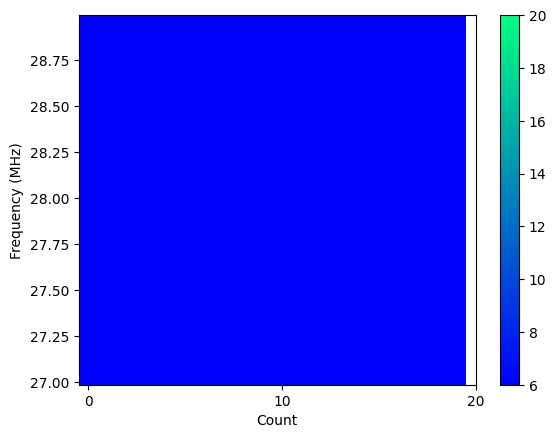

In [ ]:
#0V input, None
data = np.load(main_path+'/nano_8mA_30_13.npy')
noise = np.load(main_path+'/nano_8mA_noise.npy')

peak_freq = 27.9
ave_num = 100
deg=4

start_freq = 27
end_freq = 29


freq = noise[0]
dB = noise[1:ave_num+1]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[1:ave_num+1]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.3f} +- {:.3f}'.format(snr, std_snr))

heatmap_Qi = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_Qi.T, vmin=6, vmax=20, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(100, 67)
[peak] freq: 27.9, ave: 0.137, std: 0.055, max: 0.259
[noise] freq: 27.9, ave: 0.012, std: 2.230, max: 0.162,
[SNR] 1.932 +- 0.854


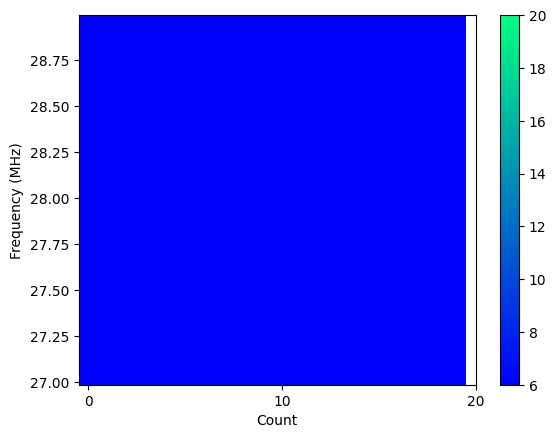

In [ ]:
#0V input, None
data = np.load(main_path+'/VNA_-30dB_30_14.npy')
noise = np.load(main_path+'/VNA_-30dB_noise.npy')

peak_freq = 27.9
ave_num = 100
deg=4

start_freq = 27
end_freq = 29


freq = noise[0]
dB = noise[1:ave_num+1]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[1:ave_num+1]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.3f} +- {:.3f}'.format(snr, std_snr))

heatmap_Qi = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_Qi.T, vmin=6, vmax=20, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(100, 67)
[peak] freq: 27.9, ave: 0.118, std: 0.037, max: 0.205
[noise] freq: 27.9, ave: -0.006, std: 1.966, max: 0.070,
[SNR] 3.669 +- 1.092


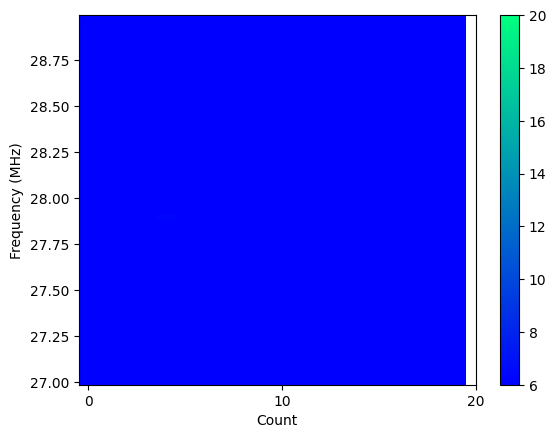

In [ ]:
#0V input, None
data = np.load(main_path+'/VNA_-25dB_30_14.npy')
noise = np.load(main_path+'/VNA_-25dB_noise.npy')

peak_freq = 27.9
ave_num = 100
deg=4

start_freq = 27
end_freq = 29


freq = noise[0]
dB = noise[1:ave_num+1]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[1:ave_num+1]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.3f} +- {:.3f}'.format(snr, std_snr))

heatmap_Qi = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_Qi.T, vmin=6, vmax=20, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(100, 67)
[peak] freq: 27.9, ave: 0.125, std: 0.021, max: 0.178
[noise] freq: 27.9, ave: -0.006, std: 1.678, max: 0.038,
[SNR] 6.629 +- 1.082


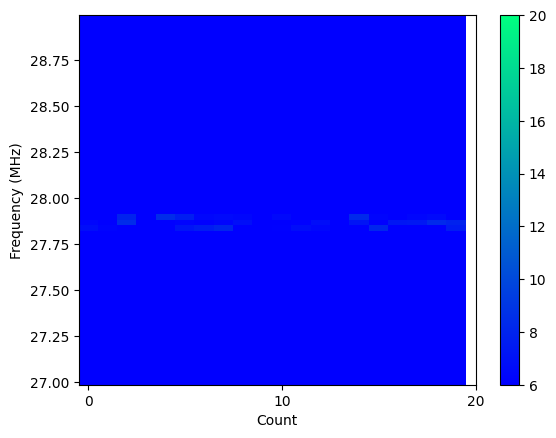

In [ ]:
#0V input, None
data = np.load(main_path+'/VNA_-20dB_30_14.npy')
noise = np.load(main_path+'/VNA_-20dB_noise.npy')

peak_freq = 27.9
ave_num = 100
deg=4

start_freq = 27
end_freq = 29


freq = noise[0]
dB = noise[1:ave_num+1]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[1:ave_num+1]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.3f} +- {:.3f}'.format(snr, std_snr))

heatmap_Qi = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_Qi.T, vmin=6, vmax=20, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(100, 67)
[peak] freq: 27.9, ave: 0.167, std: 0.015, max: 0.204
[noise] freq: 27.9, ave: -0.001, std: 0.500, max: 0.046,
[SNR] 11.348 +- 1.031


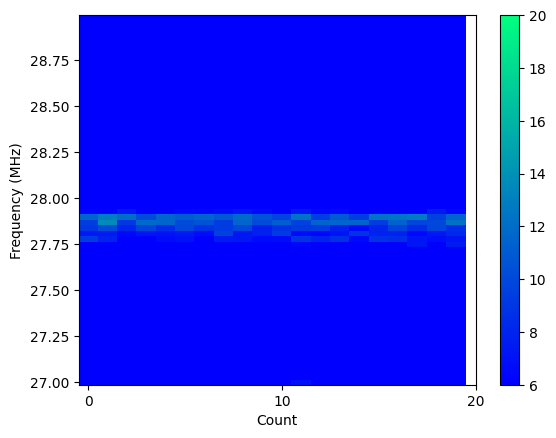

In [ ]:
#0V input, None
data = np.load(main_path+'/VNA_-15dB_30_14.npy')
noise = np.load(main_path+'/VNA_-15dB_noise.npy')

peak_freq = 27.9
ave_num = 100
deg=4

start_freq = 27
end_freq = 29


freq = noise[0]
dB = noise[1:ave_num+1]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[1:ave_num+1]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.3f} +- {:.3f}'.format(snr, std_snr))

heatmap_Qi = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_Qi.T, vmin=6, vmax=20, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(100, 67)
[peak] freq: 27.9, ave: 0.274, std: 0.010, max: 0.299
[noise] freq: 27.9, ave: 0.017, std: 0.164, max: 0.066,
[SNR] 14.527 +- 0.591


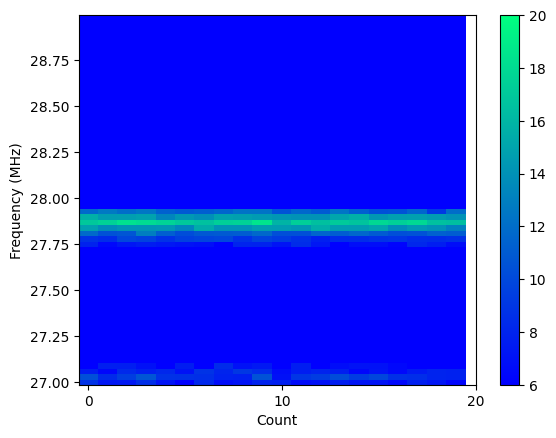

In [ ]:
#0V input, None
data = np.load(main_path+'/VNA_-10dB_30_14.npy')
noise = np.load(main_path+'/VNA_-10dB_noise.npy')

peak_freq = 27.9
ave_num = 100
deg=4

start_freq = 27
end_freq = 29


freq = noise[0]
dB = noise[1:ave_num+1]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[1:ave_num+1]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.3f} +- {:.3f}'.format(snr, std_snr))

heatmap_Qi = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_Qi.T, vmin=6, vmax=20, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(100, 67)
[peak] freq: 27.9, ave: 0.457, std: 0.012, max: 0.487
[noise] freq: 27.9, ave: 0.007, std: 0.037, max: 0.048,
[SNR] 23.907 +- 0.622


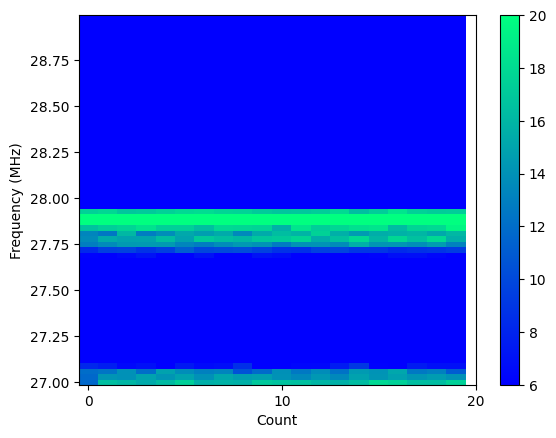

In [ ]:
#0V input, None
data = np.load(main_path+'/VNA_-5dB_30_14.npy')
noise = np.load(main_path+'/VNA_-5dB_noise.npy')

peak_freq = 27.9
ave_num = 100
deg=4

start_freq = 27
end_freq = 29


freq = noise[0]
dB = noise[1:ave_num+1]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[1:ave_num+1]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.3f} +- {:.3f}'.format(snr, std_snr))

heatmap_Qi = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_Qi.T, vmin=6, vmax=20, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(100, 67)
[peak] freq: 27.78, ave: 0.315, std: 0.006, max: 0.331
[noise] freq: 27.78, ave: 0.089, std: 0.380, max: 0.107,
[SNR] 29.776 +- 0.735


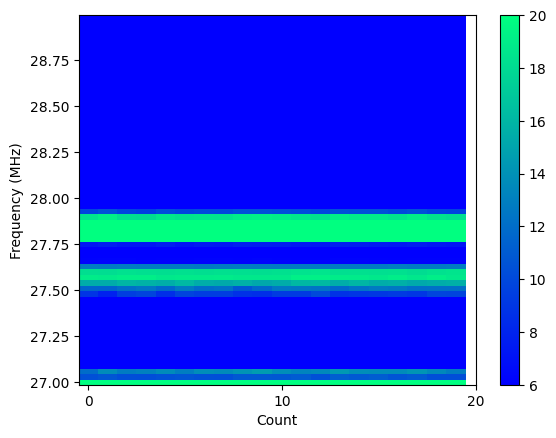

In [ ]:
#0V input, None
data = np.load(main_path+'/VNA_0dB_30_14.npy')
noise = np.load(main_path+'/VNA_0dB_noise.npy')

peak_freq = 27.78
ave_num = 100
deg=4

start_freq = 27
end_freq = 29


freq = noise[0]
dB = noise[1:ave_num+1]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[1:ave_num+1]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.3f} +- {:.3f}'.format(snr, std_snr))

heatmap_Qi = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_Qi.T, vmin=6, vmax=20, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(100, 67)
[peak] freq: 27.9, ave: 0.097, std: 0.010, max: 0.118
[noise] freq: 27.9, ave: 0.006, std: 0.013, max: 0.019,
[SNR] 14.284 +- 1.600


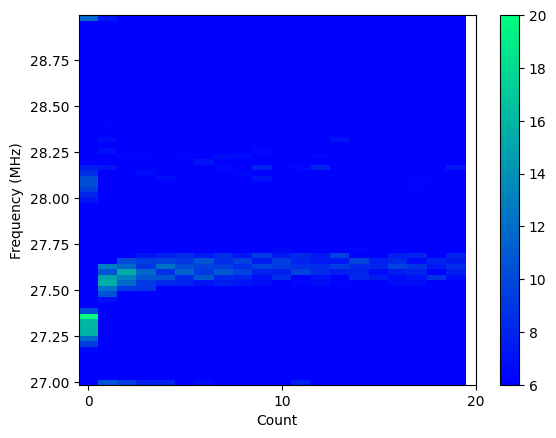

In [ ]:
#0V input, None
data = np.load(main_path+'/VNA_5dB_30_14.npy')
noise = np.load(main_path+'/VNA_5dB_noise.npy')

peak_freq = 27.9
ave_num = 100
deg=4

start_freq = 27
end_freq = 29


freq = noise[0]
dB = noise[1:ave_num+1]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[1:ave_num+1]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.3f} +- {:.3f}'.format(snr, std_snr))

heatmap_Qi = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_Qi.T, vmin=6, vmax=20, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(100, 67)
[peak] freq: 27.9, ave: 0.071, std: 0.014, max: 0.180
[noise] freq: 27.9, ave: 0.074, std: 0.042, max: 0.081,
[SNR] 0.000 +- 3.766


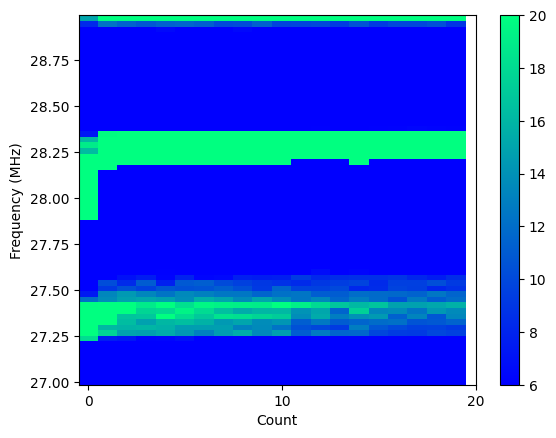

In [ ]:
#0V input, None
data = np.load(main_path+'/VNA_10dB_30_14.npy')
noise = np.load(main_path+'/VNA_10dB_noise.npy')

peak_freq = 27.9
ave_num = 100
deg=4

start_freq = 27
end_freq = 29


freq = noise[0]
dB = noise[1:ave_num+1]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[1:ave_num+1]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.3f} +- {:.3f}'.format(snr, std_snr))

heatmap_Qi = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_Qi.T, vmin=6, vmax=20, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(100, 50)
[peak] freq: 27.900000000000034, ave: 0.037, std: 0.001, max: 0.039
[noise] freq: 27.900000000000034, ave: 0.004, std: 0.005, max: 0.007,
[SNR] 29.822 +- 0.824


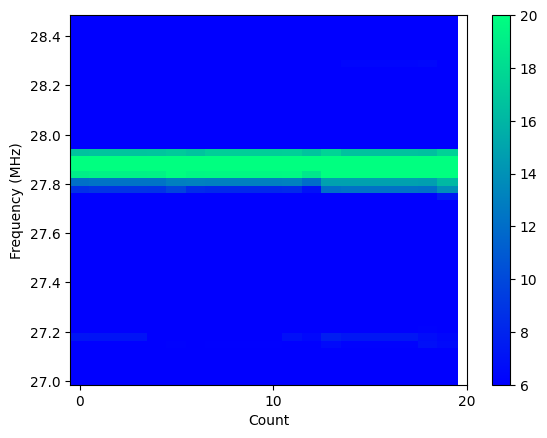

In [ ]:
#0V input, None
data = np.load(main_path+'/male1_30_14.npy')
noise = np.load(main_path+'/male1_noise.npy')

peak_freq = 27.9
ave_num = 100
deg=4

start_freq = 27
end_freq = 28.5


freq = noise[0]
dB = noise[1:ave_num+1]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[1:ave_num+1]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.3f} +- {:.3f}'.format(snr, std_snr))

heatmap_Qi = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_Qi.T, vmin=6, vmax=20, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(100, 50)
[peak] freq: 27.900000000000034, ave: 0.048, std: 0.002, max: 0.054
[noise] freq: 27.900000000000034, ave: -0.003, std: 0.006, max: 0.003,
[SNR] 24.247 +- 0.904


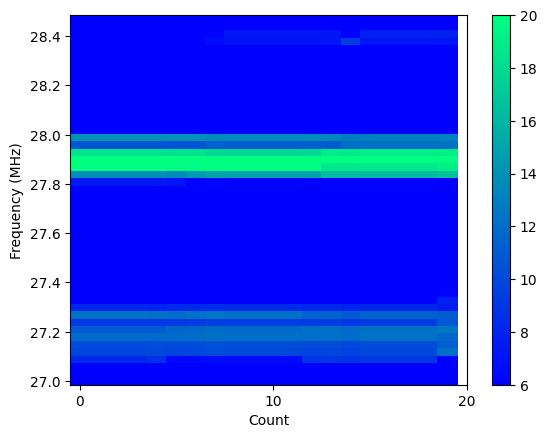

In [8]:
#0V input, None
data = np.load(main_path+'/female1_30_14.npy')
noise = np.load(main_path+'/female1_noise.npy')

peak_freq = 27.9
ave_num = 100
deg=4

start_freq = 27
end_freq = 28.5


freq = noise[0]
dB = noise[1:ave_num+1]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[1:ave_num+1]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.3f} +- {:.3f}'.format(snr, std_snr))

heatmap_Qi = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_Qi.T, vmin=6, vmax=20, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(100, 50)
[peak] freq: 27.900000000000034, ave: 0.045, std: 0.001, max: 0.048
[noise] freq: 27.900000000000034, ave: -0.006, std: 0.011, max: -0.003,
[SNR] 25.184 +- 0.512


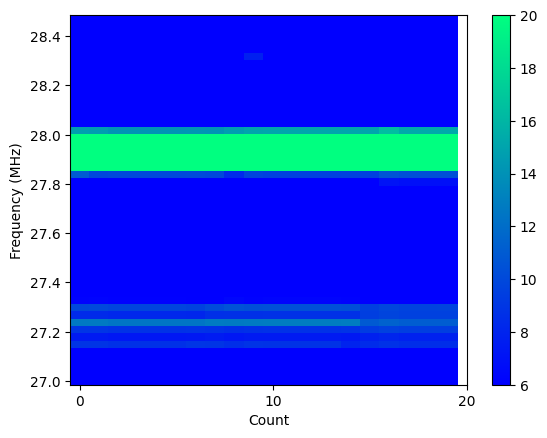

In [9]:
#0V input, None
data = np.load(main_path+'/male2_30_14.npy')
noise = np.load(main_path+'/male2_noise.npy')

peak_freq = 27.9
ave_num = 100
deg=4

start_freq = 27
end_freq = 28.5


freq = noise[0]
dB = noise[1:ave_num+1]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[1:ave_num+1]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.3f} +- {:.3f}'.format(snr, std_snr))

heatmap_Qi = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_Qi.T, vmin=6, vmax=20, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(100, 50)
[peak] freq: 27.930000000000035, ave: 0.050, std: 0.001, max: 0.052
[noise] freq: 27.930000000000035, ave: -0.004, std: 0.007, max: 0.004,
[SNR] 27.224 +- 0.467


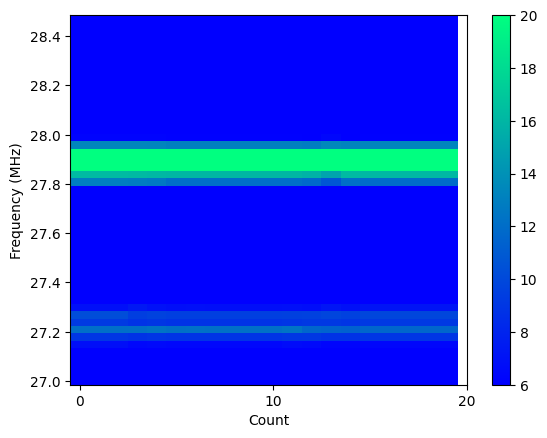

In [12]:
#0V input, None
data = np.load(main_path+'/male3_30_14.npy')
noise = np.load(main_path+'/male3_noise.npy')

peak_freq = 27.92
ave_num = 100
deg=4

start_freq = 27
end_freq = 28.5


freq = noise[0]
dB = noise[1:ave_num+1]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[1:ave_num+1]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.3f} +- {:.3f}'.format(snr, std_snr))

heatmap_Qi = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_Qi.T, vmin=6, vmax=20, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(100, 50)
[peak] freq: 27.420000000000016, ave: 0.045, std: 0.002, max: 0.049
[noise] freq: 27.420000000000016, ave: 0.006, std: 0.009, max: 0.011,
[SNR] 26.106 +- 1.195


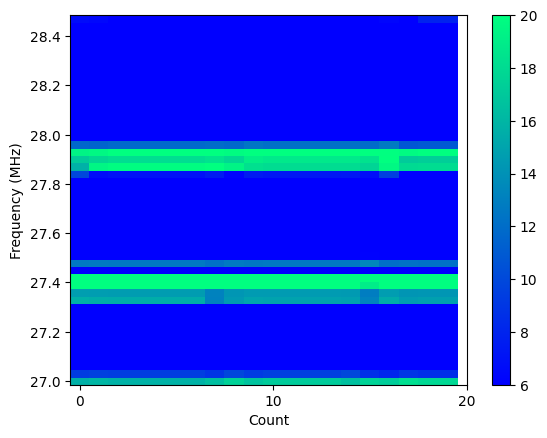

In [46]:
#0V input, None
data = np.load(main_path+'/male4_1_30_14.npy')
noise = np.load(main_path+'/male4_noise2.npy')

peak_freq = 27.43
ave_num = 100
deg=4

start_freq = 27
end_freq = 28.5


freq = noise[0]
dB = noise[1:ave_num+1]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[1:ave_num+1]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.3f} +- {:.3f}'.format(snr, std_snr))

heatmap_Qi = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_Qi.T, vmin=6, vmax=20, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(100, 50)
[peak] freq: 27.660000000000025, ave: 0.036, std: 0.002, max: 0.041
[noise] freq: 27.660000000000025, ave: -0.001, std: 0.009, max: 0.005,
[SNR] 20.880 +- 1.212


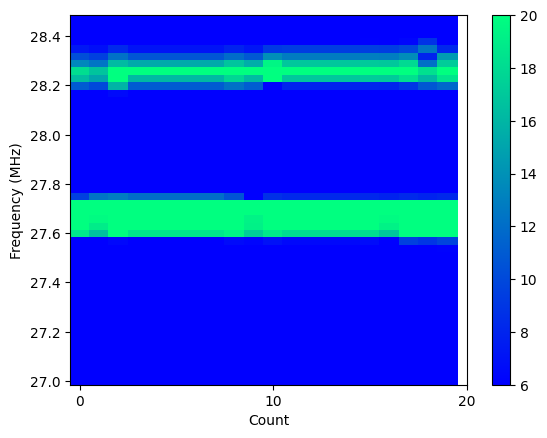

In [36]:
#0V input, None
data = np.load(main_path+'/male4_3_30_14.npy')
noise = np.load(main_path+'/male4_noise2.npy')

peak_freq = 27.65
ave_num = 100
deg=4

start_freq = 27
end_freq = 28.5


freq = noise[0]
dB = noise[1:ave_num+1]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[1:ave_num+1]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.3f} +- {:.3f}'.format(snr, std_snr))

heatmap_Qi = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_Qi.T, vmin=6, vmax=20, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(100, 50)
[peak] freq: 27.840000000000032, ave: 0.032, std: 0.005, max: 0.049
[noise] freq: 27.840000000000032, ave: -0.009, std: 0.009, max: -0.005,
[SNR] 34.101 +- 4.140


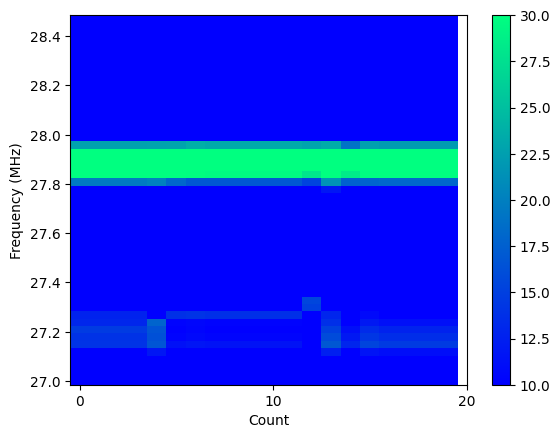

In [12]:
#0V input, None
data = np.load(main_path+'/male4_5_30_14.npy')
noise = np.load(main_path+'/male4_noise2.npy')

peak_freq = 27.83
ave_num = 100
deg=4

start_freq = 27
end_freq = 28.5
shift =5

freq = noise[0]
dB = noise[shift:ave_num+shift]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[shift:ave_num+shift]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.3f} +- {:.3f}'.format(snr, std_snr))

heatmap_55 = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_55.T, vmin=10, vmax=30, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(100, 50)
[peak] freq: 28.110000000000042, ave: 0.046, std: 0.003, max: 0.057
[noise] freq: 28.110000000000042, ave: 0.011, std: 0.009, max: 0.014,
[SNR] 22.990 +- 1.743


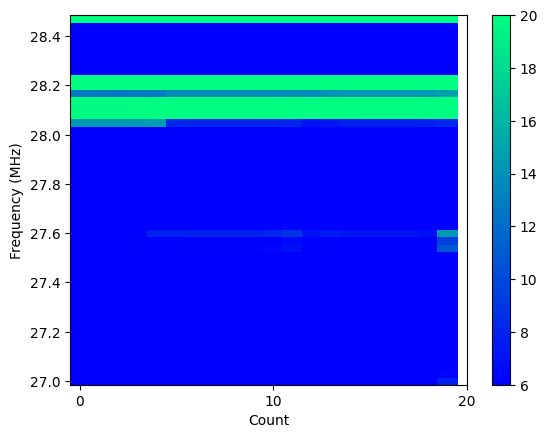

In [22]:
#0V input, None
data = np.load(main_path+'/male4_7_30_14.npy')
noise = np.load(main_path+'/male4_noise2.npy')

peak_freq = 28.12
ave_num = 100
deg=4

start_freq = 27
end_freq = 28.5


freq = noise[0]
dB = noise[1:ave_num+1]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[1:ave_num+1]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.3f} +- {:.3f}'.format(snr, std_snr))

heatmap_Qi = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_Qi.T, vmin=6, vmax=20, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(100, 50)
[peak] freq: 28.380000000000052, ave: 0.041, std: 0.011, max: 0.065
[noise] freq: 28.380000000000052, ave: -0.003, std: 0.004, max: 0.002,
[SNR] 35.290 +- 8.474


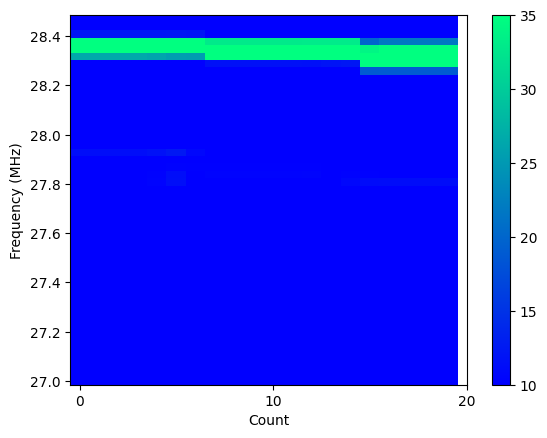

In [101]:
#0V input, None
data = np.load(main_path+'/male4_9_30_14.npy')
noise = np.load(main_path+'/male4_noise2.npy')

peak_freq = 28.37
ave_num = 100
deg=4

start_freq = 27
end_freq = 28.5
shift = 1


freq = noise[0]
dB = noise[shift:ave_num+shift]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[shift:ave_num+shift]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.3f} +- {:.3f}'.format(snr, std_snr))

heatmap_Qi = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_Qi.T, vmin=10, vmax=35, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(100, 50)
[peak] freq: 27.900000000000034, ave: 0.037, std: 0.001, max: 0.040
[noise] freq: 27.900000000000034, ave: -0.001, std: 0.004, max: 0.004,
[SNR] 25.663 +- 0.455


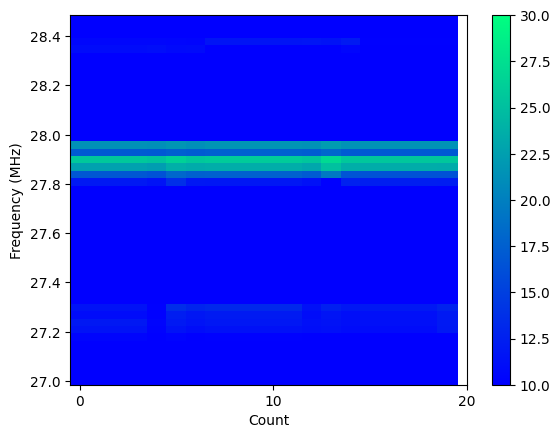

In [19]:
#0V input, None
data = np.load(main_path+'/crowded_14_30.npy')
noise = np.load(main_path+'/crowded_noise.npy')

peak_freq = 27.9
ave_num = 100
deg=4

start_freq = 27
end_freq = 28.5
shift = 24

freq = noise[0]
dB = noise[shift:ave_num+shift]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[shift:ave_num+shift]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.3f} +- {:.3f}'.format(snr, std_snr))

heatmap_Qi = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_Qi.T, vmin=10, vmax=30, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)
plt.savefig('SNR_crowd.svg')

In [4]:
#0V input, None
data = np.load(main_path+'/female2_1_30_14.npy')
noise = np.load(main_path+'/female2_noise.npy')

peak_freq = 27.4
ave_num = 100
deg=4

start_freq = 27
end_freq = 28.5


freq = noise[0]
dB = noise[1:ave_num+1]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[1:ave_num+1]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.3f} +- {:.3f}'.format(snr, std_snr))

heatmap_Qi = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_Qi.T, vmin=10, vmax=32, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

NameError: name 'analyzeNoise' is not defined

(100, 50)
[peak] freq: 27.690000000000026, ave: 0.033, std: 0.001, max: 0.035
[noise] freq: 27.690000000000026, ave: -0.005, std: 0.002, max: -0.003,
[SNR] 42.354 +- 0.948


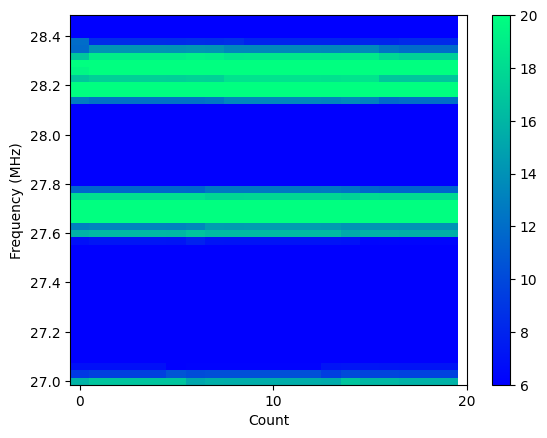

In [14]:
#0V input, None
data = np.load(main_path+'/female2_3_30_14.npy')
noise = np.load(main_path+'/female2_noise.npy')

peak_freq = 27.7
ave_num = 100
deg=4

start_freq = 27
end_freq = 28.5


freq = noise[0]
dB = noise[1:ave_num+1]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[1:ave_num+1]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.3f} +- {:.3f}'.format(snr, std_snr))

heatmap_Qi = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_Qi.T, vmin=6, vmax=20, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(100, 50)
[peak] freq: 27.900000000000034, ave: 0.032, std: 0.001, max: 0.033
[noise] freq: 27.900000000000034, ave: 0.004, std: 0.002, max: 0.008,
[SNR] 24.680 +- 0.569


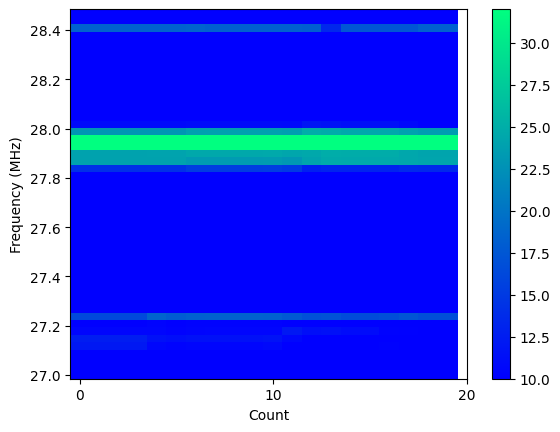

In [24]:
#0V input, None
data = np.load(main_path+'/female2_5_30_14.npy')
noise = np.load(main_path+'/female2_noise.npy')

peak_freq = 27.9
ave_num = 100
deg=4

start_freq = 27
end_freq = 28.5


freq = noise[0]
dB = noise[50:ave_num+50]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[50:ave_num+50]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.3f} +- {:.3f}'.format(snr, std_snr))

heatmap_Qi = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_Qi.T, vmin=10, vmax=32, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(100, 50)
[peak] freq: 28.200000000000045, ave: 0.025, std: 0.001, max: 0.027
[noise] freq: 28.200000000000045, ave: -0.002, std: 0.002, max: 0.001,
[SNR] 38.705 +- 0.925


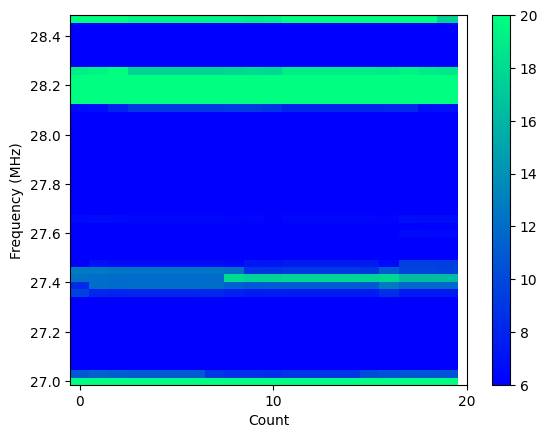

In [20]:
#0V input, None
data = np.load(main_path+'/female2_7_30_14.npy')
noise = np.load(main_path+'/female2_noise.npy')

peak_freq = 28.2
ave_num = 100
deg=4

start_freq = 27
end_freq = 28.5


freq = noise[0]
dB = noise[1:ave_num+1]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[1:ave_num+1]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.3f} +- {:.3f}'.format(snr, std_snr))

heatmap_Qi = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_Qi.T, vmin=6, vmax=20, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(100, 50)
[peak] freq: 28.470000000000056, ave: 0.031, std: 0.003, max: 0.039
[noise] freq: 28.470000000000056, ave: 0.005, std: 0.002, max: 0.007,
[SNR] 15.659 +- 1.595


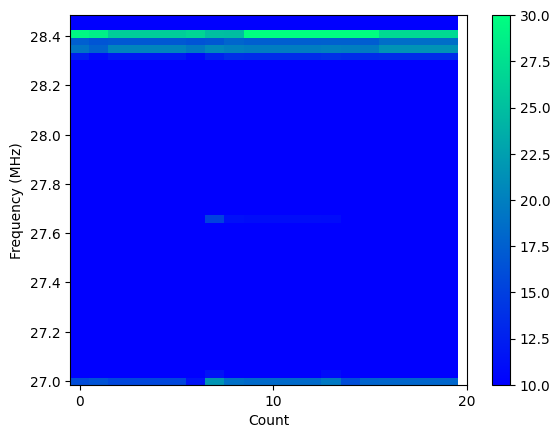

In [15]:
#0V input, None
data = np.load(main_path+'/female2_9_30_14.npy')
noise = np.load(main_path+'/female2_noise.npy')

peak_freq = 28.5
ave_num = 100
deg=4

start_freq = 27
end_freq = 28.5
shift = 80

freq = noise[0]
dB = noise[shift:ave_num+shift]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[shift:ave_num+shift]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.3f} +- {:.3f}'.format(snr, std_snr))

heatmap_99 = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_99.T, vmin=10, vmax=30, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(100, 50)
[peak] freq: 27.450000000000017, ave: 0.037, std: 0.001, max: 0.039
[noise] freq: 27.450000000000017, ave: 0.002, std: 0.008, max: 0.007,
[SNR] 31.840 +- 0.639


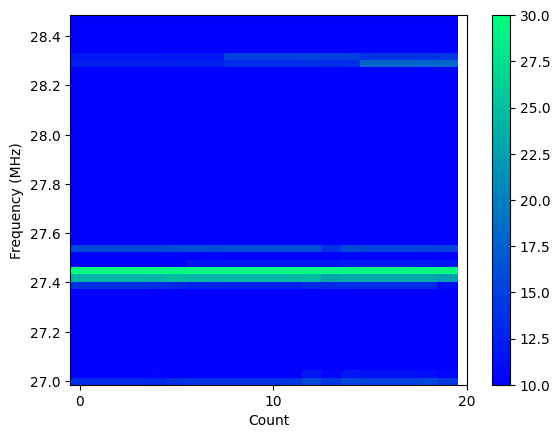

In [10]:
#0V input, None
data = np.load(main_path+'/male5_1_30_14.npy')
noise = np.load(main_path+'/male5_noise.npy')

peak_freq = 27.46
ave_num = 100
deg=4

start_freq = 27
end_freq = 28.5
shift = 22

freq = noise[0]
dB = noise[shift:ave_num+shift]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[shift:ave_num+shift]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.3f} +- {:.3f}'.format(snr, std_snr))

heatmap_11 = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_11.T, vmin=10, vmax=30, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(100, 50)
[peak] freq: 27.720000000000027, ave: 0.042, std: 0.001, max: 0.046
[noise] freq: 27.720000000000027, ave: -0.001, std: 0.008, max: 0.003,
[SNR] 37.707 +- 0.715


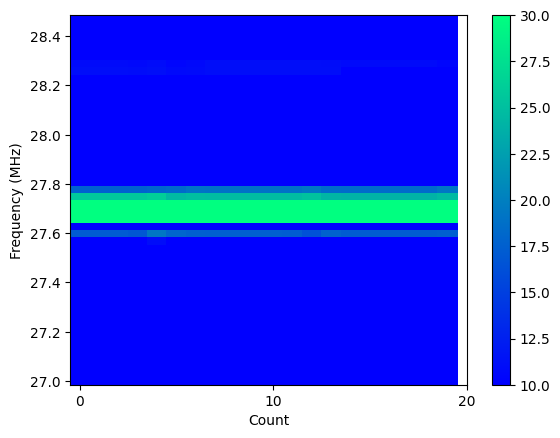

In [31]:
#0V input, None
data = np.load(main_path+'/male5_3_30_14.npy')
noise = np.load(main_path+'/male5_noise.npy')

peak_freq = 27.72
ave_num = 100
deg=4

start_freq = 27
end_freq = 28.5
shift = 63

freq = noise[0]
dB = noise[shift:ave_num+shift]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[shift:ave_num+shift]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.3f} +- {:.3f}'.format(snr, std_snr))

heatmap_33 = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_33.T, vmin=10, vmax=30, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(100, 50)
[peak] freq: 28.140000000000043, ave: 0.042, std: 0.002, max: 0.047
[noise] freq: 28.140000000000043, ave: 0.000, std: 0.008, max: 0.007,
[SNR] 25.619 +- 1.097


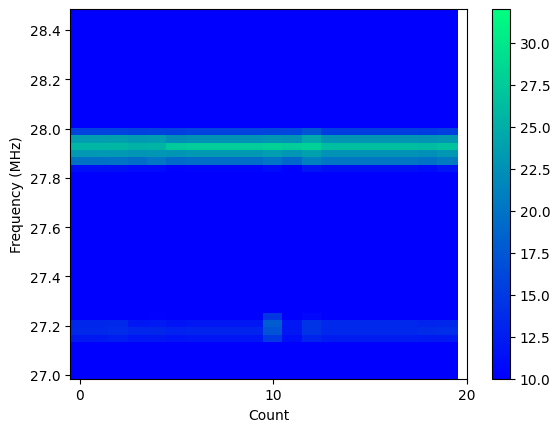

In [62]:
#0V input, None
data = np.load(main_path+'/male5_5_30_14.npy')
noise = np.load(main_path+'/male5_noise.npy')

peak_freq = 28.14
ave_num = 100
deg=4

start_freq = 27
end_freq = 28.5


freq = noise[0]
dB = noise[33:ave_num+33]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[33:ave_num+33]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.3f} +- {:.3f}'.format(snr, std_snr))

heatmap_Qi = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_Qi.T, vmin=10, vmax=32, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(100, 50)
[peak] freq: 28.29000000000005, ave: 0.036, std: 0.002, max: 0.040
[noise] freq: 28.29000000000005, ave: -0.003, std: 0.008, max: 0.002,
[SNR] 29.271 +- 1.637


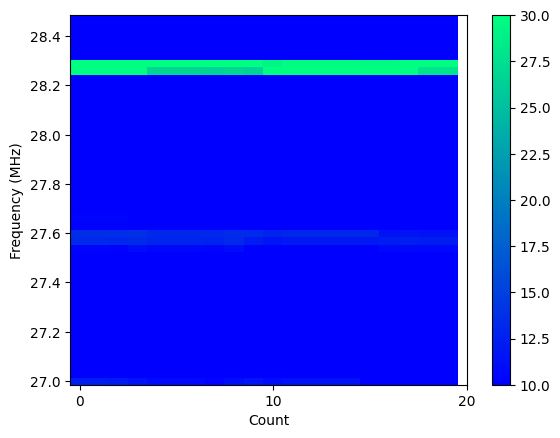

In [14]:
#0V input, None
data = np.load(main_path+'/male5_7_30_14.npy')
noise = np.load(main_path+'/male5_noise.npy')

peak_freq = 28.3
ave_num = 100
deg=4

start_freq = 27
end_freq = 28.5
shift = 45

freq = noise[0]
dB = noise[shift:ave_num+shift]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[shift:ave_num+shift]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.3f} +- {:.3f}'.format(snr, std_snr))

heatmap_77 = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_77.T, vmin=10, vmax=30, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(100, 50)
[peak] freq: 28.470000000000056, ave: 0.036, std: 0.002, max: 0.039
[noise] freq: 28.470000000000056, ave: -0.002, std: 0.008, max: 0.003,
[SNR] 18.301 +- 0.871


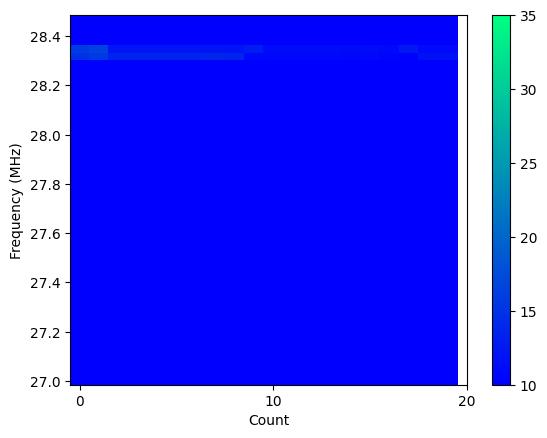

In [131]:
#0V input, None
data = np.load(main_path+'/male5_9_30_14.npy')
noise = np.load(main_path+'/male5_noise.npy')

peak_freq = 28.47
ave_num = 100
deg=4

start_freq = 27
end_freq = 28.5


freq = noise[0]
dB = noise[50:ave_num+50]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[50:ave_num+50]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.3f} +- {:.3f}'.format(snr, std_snr))

heatmap_Qi = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_Qi.T, vmin=10, vmax=35, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(100, 50)
[peak] freq: 27.330000000000013, ave: 0.033, std: 0.001, max: 0.040
[noise] freq: 27.330000000000013, ave: -0.002, std: 0.003, max: 0.001,
[SNR] 25.103166 +- 0.977616


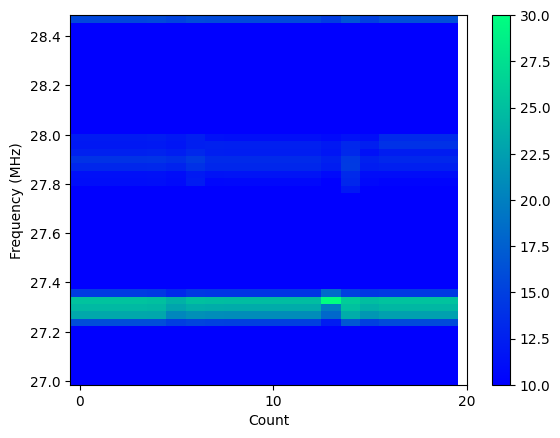

In [7]:
#0V input, None
data = np.load(main_path+'/male5_0_30_14.npy')
noise = np.load(main_path+'/male5_0_noise.npy')

peak_freq = 27.32
ave_num = 100
deg=4

start_freq = 27
end_freq = 28.5


freq = noise[0]
dB = noise[1:ave_num+1]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[1:ave_num+1]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.6f} +- {:.6f}'.format(snr, std_snr))

heatmap_00 = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_00.T, vmin=10, vmax=30, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(100, 67)
[peak] freq: 27.330000000000013, ave: 0.017, std: 0.000, max: 0.018
[noise] freq: 27.330000000000013, ave: -0.011, std: 0.003, max: -0.010,
[SNR] 51.607765 +- 0.643973


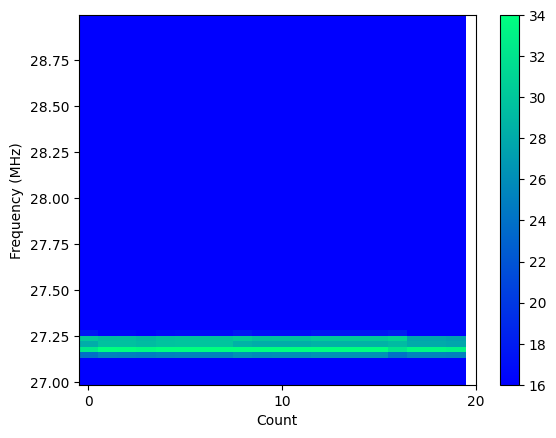

In [35]:
#0V input, None
data = np.load(main_path+'/figure_0_30_14.npy')
noise = np.load(main_path+'/figure_0_noise.npy')

peak_freq = 27.32
ave_num = 100
deg=4

start_freq = 27
end_freq = 29


freq = noise[0]
dB = noise[1:ave_num+1]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[1:ave_num+1]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.6f} +- {:.6f}'.format(snr, std_snr))

heatmap_Qi = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_Qi.T, vmin=16, vmax=34, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(100, 67)
[peak] freq: 27.330000000000013, ave: 0.009, std: 0.000, max: 0.010
[noise] freq: 27.330000000000013, ave: -0.011, std: 0.003, max: -0.010,
[SNR] 36.314466 +- 0.857287


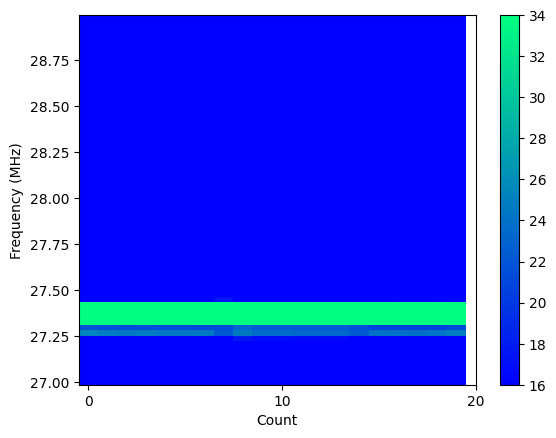

In [40]:
#0V input, None
data = np.load(main_path+'/figure_1_30_14.npy')
noise = np.load(main_path+'/figure_0_noise.npy')

peak_freq = 27.32
ave_num = 100
deg=4

start_freq = 27
end_freq = 29


freq = noise[0]
dB = noise[1:ave_num+1]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[1:ave_num+1]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.6f} +- {:.6f}'.format(snr, std_snr))

heatmap_Qi = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_Qi.T, vmin=16, vmax=34, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(100, 50)
[peak] freq: 27.600000000000023, ave: 0.025, std: 0.001, max: 0.026
[noise] freq: 27.600000000000023, ave: 0.002, std: 0.001, max: 0.004,
[SNR] 44.169613 +- 1.107531


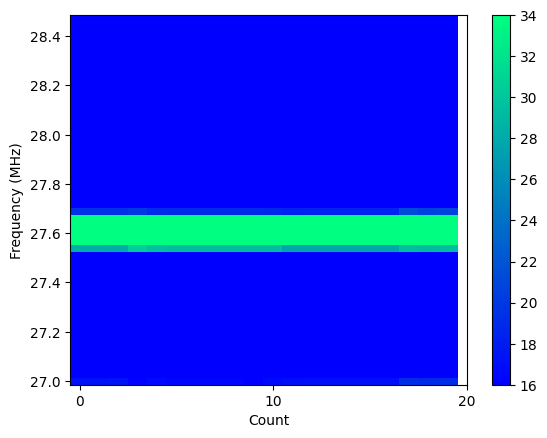

In [62]:
#0V input, None
data = np.load(main_path+'/figure_3_30_14.npy')
noise = np.load(main_path+'/figure_0_noise.npy')

peak_freq = 27.6
ave_num = 100
deg=4

start_freq = 27
end_freq = 28.5


freq = noise[0]
dB = noise[1:ave_num+1]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[1:ave_num+1]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.6f} +- {:.6f}'.format(snr, std_snr))

heatmap_Qi = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_Qi.T, vmin=16, vmax=34, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(100, 50)
[peak] freq: 27.81000000000003, ave: 0.024, std: 0.002, max: 0.031
[noise] freq: 27.81000000000003, ave: 0.004, std: 0.001, max: 0.005,
[SNR] 37.729209 +- 3.719215


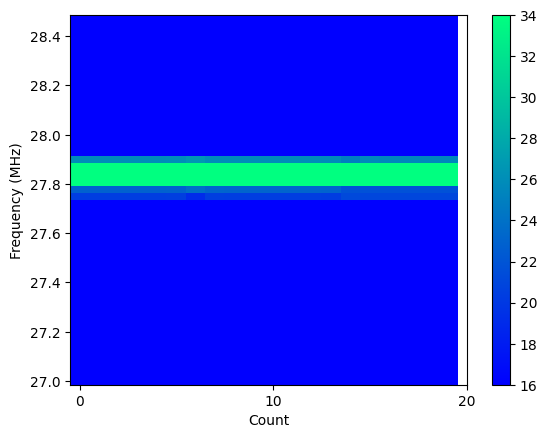

In [66]:
#0V input, None
data = np.load(main_path+'/figure_5_30_14.npy')
noise = np.load(main_path+'/figure_0_noise.npy')

peak_freq = 27.8
ave_num = 100
deg=4

start_freq = 27
end_freq = 28.5


freq = noise[0]
dB = noise[1:ave_num+1]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[1:ave_num+1]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.6f} +- {:.6f}'.format(snr, std_snr))

heatmap_Qi = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_Qi.T, vmin=16, vmax=34, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(100, 50)
[peak] freq: 27.81000000000003, ave: 0.002, std: 0.001, max: 0.004
[noise] freq: 27.81000000000003, ave: 0.004, std: 0.001, max: 0.005,
[SNR] 0.000000 +- 1.222944


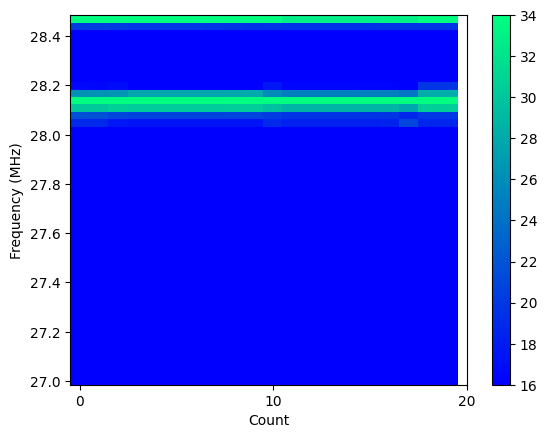

In [259]:
#0V input, None
data = np.load(main_path+'/figure_7_30_14.npy')
noise = np.load(main_path+'/figure_0_noise.npy')

peak_freq = 27.8
ave_num = 100
deg=4

start_freq = 27
end_freq = 28.5


freq = noise[0]
dB = noise[50:ave_num+50]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[50:ave_num+50]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.6f} +- {:.6f}'.format(snr, std_snr))

heatmap_Qi = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_Qi.T, vmin=16, vmax=34, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(100, 50)
[peak] freq: 27.81000000000003, ave: 0.004, std: 0.001, max: 0.005
[noise] freq: 27.81000000000003, ave: 0.004, std: 0.001, max: 0.005,
[SNR] 0.000000 +- 1.335095


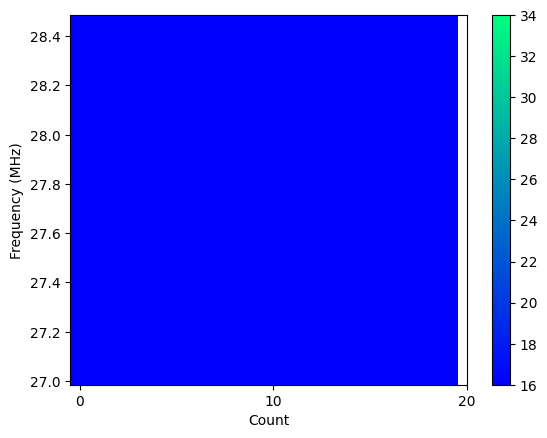

In [63]:
#0V input, None
data = np.load(main_path+'/figure_9_30_14.npy')
noise = np.load(main_path+'/figure_0_noise.npy')

peak_freq = 27.8
ave_num = 100
deg=4

start_freq = 27
end_freq = 28.5


freq = noise[0]
dB = noise[1:ave_num+1]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[1:ave_num+1]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.6f} +- {:.6f}'.format(snr, std_snr))

heatmap_Qi = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_Qi.T, vmin=16, vmax=34, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(100, 50)
[peak] freq: 28.410000000000053, ave: 0.025, std: 0.001, max: 0.026
[noise] freq: 28.410000000000053, ave: -0.002, std: 0.004, max: -0.000,
[SNR] 32.493388 +- 1.091418


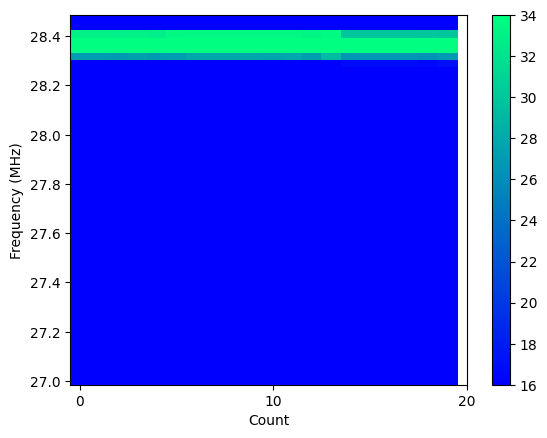

In [27]:
#0V input, None
data = np.load(main_path+'/male01_9.npy')
noise = np.load(main_path+'/male01_9_noise.npy')

peak_freq = 28.4
ave_num = 100
deg=4

start_freq = 27
end_freq = 28.5


freq = noise[0]
dB = noise[1:ave_num+1]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[1:ave_num+1]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.6f} +- {:.6f}'.format(snr, std_snr))

heatmap_9 = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_9.T, vmin=16, vmax=34, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(100, 50)
[peak] freq: 28.110000000000042, ave: 0.020, std: 0.001, max: 0.021
[noise] freq: 28.110000000000042, ave: 0.002, std: 0.003, max: 0.003,
[SNR] 25.689467 +- 1.306066


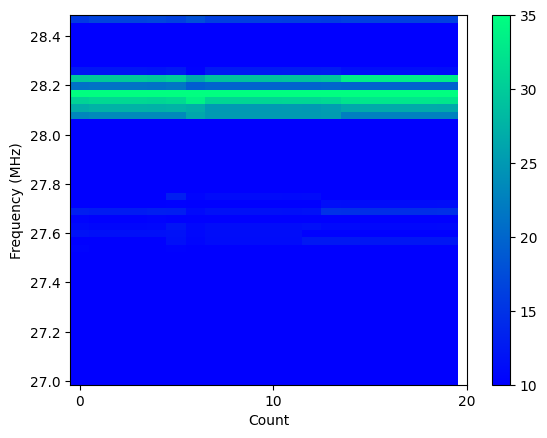

In [271]:
#0V input, None
data = np.load(main_path+'/male0_7.npy')
noise = np.load(main_path+'/male0_7_noise.npy')

peak_freq = 28.1
ave_num = 100
deg=4

start_freq = 27
end_freq = 28.5


freq = noise[0]
dB = noise[1:ave_num+1]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[1:ave_num+1]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.6f} +- {:.6f}'.format(snr, std_snr))

heatmap_Qi = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_Qi.T, vmin=10, vmax=35, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(100, 50)
[peak] freq: 27.75000000000003, ave: 0.013, std: 0.001, max: 0.014
[noise] freq: 27.75000000000003, ave: -0.003, std: 0.002, max: -0.001,
[SNR] 20.779743 +- 1.078237


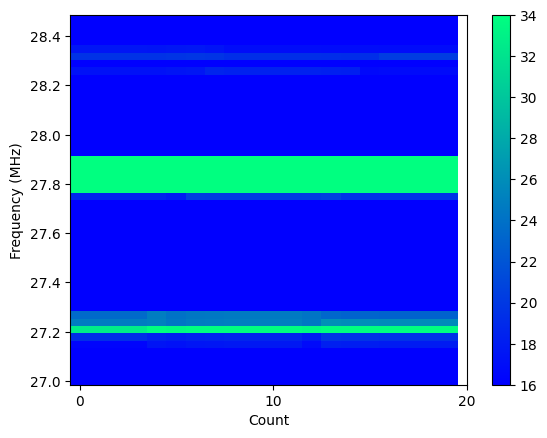

In [37]:
#0V input, None
data = np.load(main_path+'/male0_5.npy')
noise = np.load(main_path+'/male0_noise.npy')

peak_freq = 27.76
ave_num = 100
deg=4

start_freq = 27
end_freq = 28.5


freq = noise[0]
dB = noise[1:ave_num+1]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[1:ave_num+1]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.6f} +- {:.6f}'.format(snr, std_snr))

heatmap_Qi = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_Qi.T, vmin=16, vmax=34, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(100, 50)
[peak] freq: 27.54000000000002, ave: 0.013, std: 0.000, max: 0.014
[noise] freq: 27.54000000000002, ave: -0.001, std: 0.001, max: 0.001,
[SNR] 28.490565 +- 0.961535


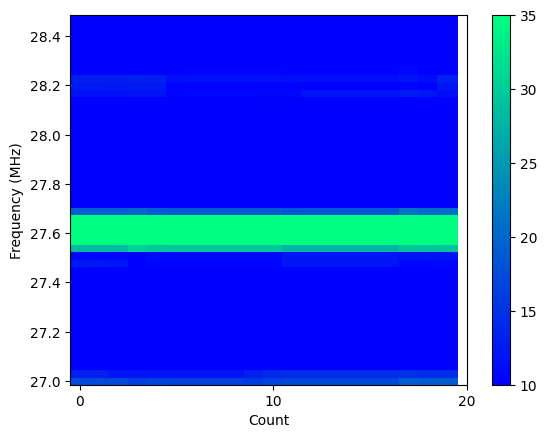

In [45]:
#0V input, None
data = np.load(main_path+'/figure_3_30_14.npy')
noise = np.load(main_path+'/figure_0_noise.npy')

peak_freq = 27.55
ave_num = 100
deg=4

start_freq = 27
end_freq = 28.5


freq = noise[0]
dB = noise[1:ave_num+1]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[1:ave_num+1]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.6f} +- {:.6f}'.format(snr, std_snr))

heatmap_3 = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_3.T, vmin=10, vmax=35, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(100, 50)
[peak] freq: 27.360000000000014, ave: 0.013, std: 0.001, max: 0.015
[noise] freq: 27.360000000000014, ave: 0.002, std: 0.008, max: 0.003,
[SNR] 21.671380 +- 1.105778


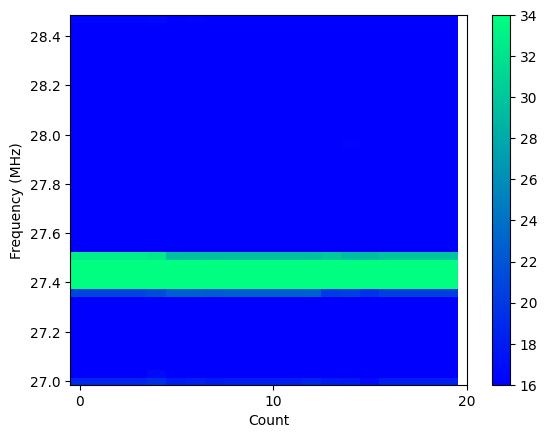

In [48]:
#0V input, None
data = np.load(main_path+'/male0_1.npy')
noise = np.load(main_path+'/male0_1_noise.npy')

peak_freq = 27.37
ave_num = 100
deg=5

start_freq = 27
end_freq = 28.5


freq = noise[0]
dB = noise[15:ave_num+15]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[15:ave_num+15]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.6f} +- {:.6f}'.format(snr, std_snr))

heatmap_1 = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_1.T, vmin=16, vmax=34, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(100, 50)
[peak] freq: 27.210000000000008, ave: 0.025, std: 0.003, max: 0.049
[noise] freq: 27.210000000000008, ave: 0.003, std: 0.008, max: 0.004,
[SNR] 26.664431 +- 3.798421


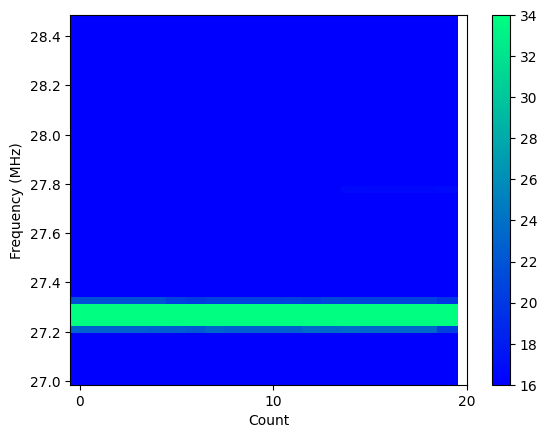

In [50]:
#0V input, None
data = np.load(main_path+'/male0_0.npy')
noise = np.load(main_path+'/male0_1_noise.npy')

peak_freq = 27.22
ave_num = 100
deg=4

start_freq = 27
end_freq = 28.5


freq = noise[0]
dB = noise[1:ave_num+1]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[1:ave_num+1]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.6f} +- {:.6f}'.format(snr, std_snr))

heatmap_0 = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_0.T, vmin=16, vmax=34, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

In [ ]:
#0V input, None
data = np.load(main_path+'/male0_0.npy')
noise = np.load(main_path+'/male0_1_noise.npy')

peak_freq = 27.2
ave_num = 100
deg=4

start_freq = 27
end_freq = 28.5


freq = noise[0]
dB = noise[1:ave_num+1]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[1:ave_num+1]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.6f} +- {:.6f}'.format(snr, std_snr))

heatmap_Qi = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_Qi.T, vmin=16, vmax=34, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(86, 50)
[peak] freq: 28.170000000000044, ave: 0.022, std: 0.001, max: 0.024
[noise] freq: 28.170000000000044, ave: 0.001, std: 0.003, max: 0.002,
[SNR] 46.863603 +- 1.699760


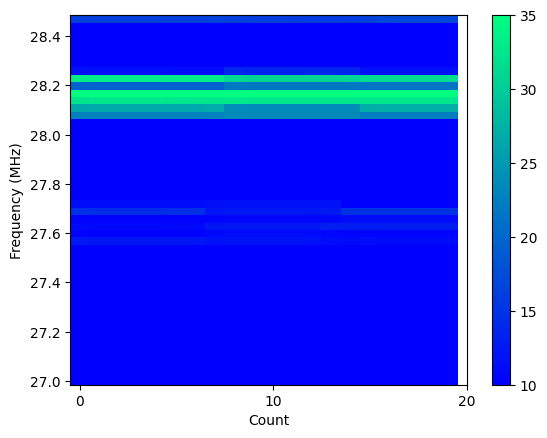

In [23]:
#0V input, None
data = np.load(main_path+'/male0_7.npy')
noise = np.load(main_path+'/male0_7_noise.npy')

peak_freq = 28.16
ave_num = 100
deg=4

start_freq = 27
end_freq = 28.5


freq = noise[0]
dB = noise[1:ave_num+1]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[15:ave_num+1]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.6f} +- {:.6f}'.format(snr, std_snr))

heatmap_7 = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_7.T, vmin=10, vmax=35, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(80, 50)
[peak] freq: 27.930000000000035, ave: 0.047, std: 0.001, max: 0.051
[noise] freq: 27.930000000000035, ave: -0.000, std: 0.002, max: 0.003,
[SNR] 37.767942 +- 0.864095


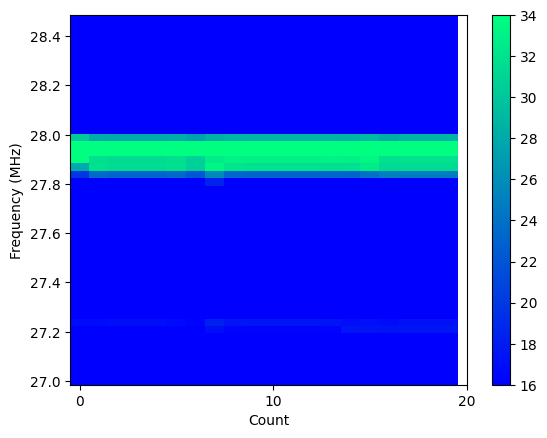

In [33]:
#0V input, None
data = np.load(main_path+'/male01_5.npy')
noise = np.load(main_path+'/male01_5_noise.npy')

peak_freq = 27.93
ave_num = 100
deg=4

start_freq = 27
end_freq = 28.5


freq = noise[0]
dB = noise[120:ave_num+120]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[120:ave_num+120]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.6f} +- {:.6f}'.format(snr, std_snr))

heatmap_5 = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_5.T, vmin=16, vmax=34, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(100, 50)
[peak] freq: 27.930000000000035, ave: 0.037, std: 0.008, max: 0.060
[noise] freq: 27.930000000000035, ave: 0.007, std: 0.004, max: 0.013,
[SNR] 10.252 +- 2.801


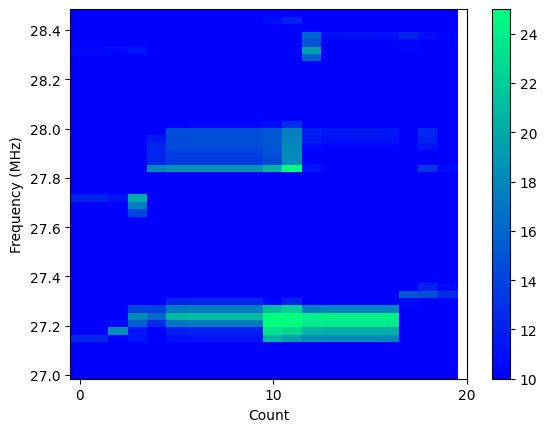

In [257]:
#0V input, None
data = np.load(main_path+'/car_1.npy')

noise = np.load(main_path+'/car_noise_3.npy')
#noise = np.load(main_path+'/figure_noise.npy')

peak_freq = 27.92
ave_num = 100
deg=4

start_freq = 27
end_freq = 28.5


freq = noise[0]
dB = noise[1:ave_num+1]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[1:ave_num+1]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.3f} +- {:.3f}'.format(snr, std_snr))

heatmap_Qi = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_Qi.T, vmin=10, vmax=25, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(100, 50)
[peak] freq: 27.960000000000036, ave: 0.057, std: 0.004, max: 0.075
[noise] freq: 27.960000000000036, ave: 0.003, std: 0.003, max: 0.010,
[SNR] 27.286 +- 2.132


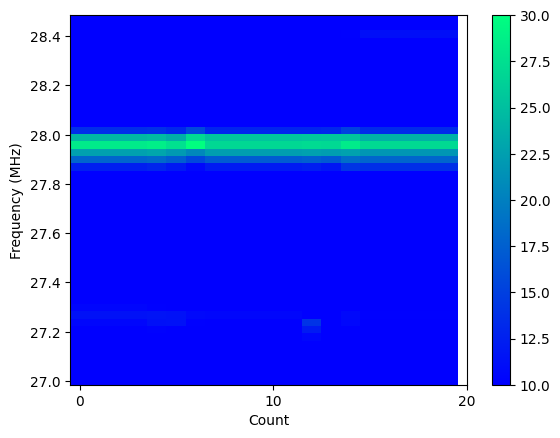

In [9]:
#0V input, None
data = np.load(main_path+'/train_4.npy')
noise = np.load(main_path+'/train_noise_3.npy')
#noise = np.load(main_path+'/figure_noise.npy')

peak_freq = 27.97
ave_num = 100
deg=4

start_freq = 27
end_freq = 28.5
shift = 60

freq = noise[0]
dB = noise[shift:ave_num+shift]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[shift:ave_num+shift]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.3f} +- {:.3f}'.format(snr, std_snr))

heatmap_Qi = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_Qi.T, vmin=10, vmax=30, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)
plt.savefig('SNR_train.svg')

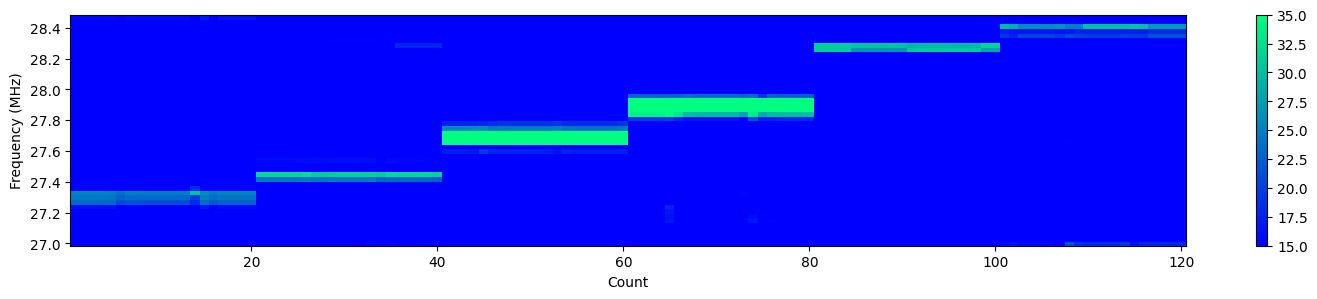

In [32]:
heatmap = np.concatenate((heatmap_00, heatmap_11, heatmap_33, heatmap_55, heatmap_77, heatmap_99), axis=0)
x1 = np.arange(1, 20*6+1, 1)
y1 = np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])

plt.figure(figsize=(18, 3))
c=plt.pcolor(x1, y1, heatmap.T, vmin=10, vmax=30, cmap='winter')
plt.xlabel('Count')
#plt.xticks(np.arange(0, heatmap_len*6, 10))
plt.ylabel('Frequency (MHz)')
plt.colorbar(c)
plt.savefig('heatmap_EM.svg')

(100, 50)
[peak] freq: 27.960000000000036, ave: 0.024, std: 0.000, max: 0.026
[noise] freq: 27.960000000000036, ave: -0.002, std: 0.003, max: 0.001,
[SNR] 37.293 +- 0.704


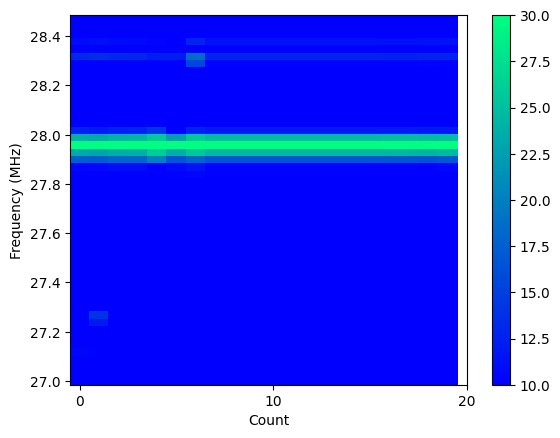

In [12]:
#0V input, None
data = np.load(main_path+'/test.npy')
noise = np.load(main_path+'/test_noise.npy')
#noise = np.load(main_path+'/figure_noise.npy')

peak_freq = 27.96
ave_num = 100
deg=5

start_freq = 27
end_freq = 28.5
shift = 1

freq = noise[0]
dB = noise[shift:ave_num+shift]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[shift:ave_num+shift]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.3f} +- {:.3f}'.format(snr, std_snr))

heatmap_Qi = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_Qi.T, vmin=10, vmax=30, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)

(100, 50)
[peak] freq: 27.960000000000036, ave: 0.029, std: 0.003, max: 0.037
[noise] freq: 27.960000000000036, ave: 0.001, std: 0.004, max: 0.004,
[SNR] 26.991 +- 2.806


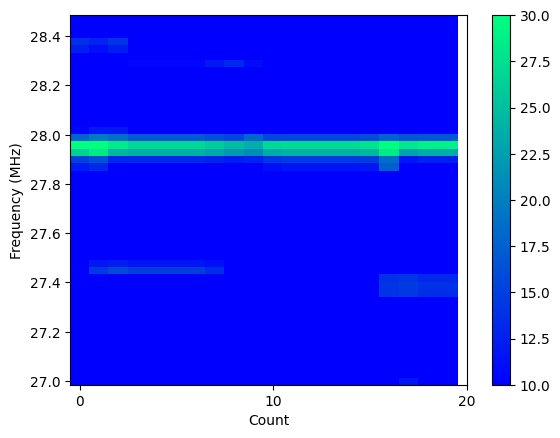

In [48]:
#0V input, None
data = np.load(main_path+'/car1_5.npy')
noise = np.load(main_path+'/car1_noise_6.npy')
#noise = np.load(main_path+'/figure_noise.npy')

peak_freq = 27.96
ave_num = 100
deg=5

start_freq = 27
end_freq = 28.5
shift = 25

freq = noise[0]
dB = noise[shift:ave_num+shift]
target_ids = np.where((freq >= start_freq) & (freq <= end_freq))

noise_diff_ave, noise_diff_std, noise_diff_max, noise_std_max, noise_max_max = analyzeNoise(freq, dB, target_ids, deg)


freq = data[0]
dB = data[shift:ave_num+shift]
data_diff_ave,  data_diff_std,  data_diff_max = analyzeData(freq, dB, target_ids, deg)

id = (np.abs(freq[target_ids] - peak_freq)).argmin()
x = freq[target_ids]

print('[peak] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f}'.format(x[id], data_diff_ave[id],data_diff_std[id],data_diff_max[id]))
print('[noise] freq: {}, ave: {:.3f}, std: {:.3f}, max: {:.3f},'.format(x[id], noise_diff_ave[id],noise_std_max,noise_diff_max[id]))

snr = (data_diff_ave[id] - noise_diff_ave[id]) if (data_diff_ave[id] - noise_diff_ave[id]) > 0 else 0
snr = snr / noise_diff_std[id]
std_snr = data_diff_std[id] / noise_diff_std[id]
print('[SNR] {:.3f} +- {:.3f}'.format(snr, std_snr))

heatmap_Qi = makeColormap(freq, dB, target_ids, deg, noise_diff_ave, noise_diff_std)

x1=np.arange(0, heatmap_len, 1)
f1=freq[target_ids]
y1=np.arange(f1[0], f1[-1]+f1[1]-f1[0], f1[1]-f1[0])
c=plt.pcolor(x1, y1, heatmap_Qi.T, vmin=10, vmax=30, cmap='winter')
plt.xlabel('Count')
plt.xticks(np.arange(0, heatmap_len+1, 10))
plt.ylabel('Frequency (MHz)')
#plt.yticks(np.arange(28, 9, 29.7))
plt.colorbar(c)
plt.savefig('SNR_car.svg')